In [72]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
import matplotlib.ticker as ticker

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

import gif
import imageio

In [73]:
#PATH = '/usr/scratch/mont-fort17/dleonard/GW_paper/CNT_32/linear_results/CNT_biased_selfv_offdiag_1.0/'
PATH1 = '/usr/scratch/mont-fort17/dleonard/GW_paper/CNT_32/linear_results/CNT_biased_sc_selfv_offdiag_epsR1_n40/'
#PATH = '/home/dleonard/Documents/QuaTrEx/quatrex/results/SINW_biased_epsR1_n50/'
#PATH = '/usr/scratch/tortin19/dleonard/daint_results/Si_NW_14000_27_SC_eps125/'
#PATH = '/usr/scratch/tortin19/dleonard/daint_results/Si_NW_14000_27_SC_eps3_W/'
PATH = '/usr/scratch/tortin19/dleonard/daint_results/Si_NW_7200_27_PS_eps5/'
#PATH = '/usr/scratch/tortin19/dleonard/daint_results/CNT_biased_SC_BB1_epsR1_n174/'
#PATH = '/usr/scratch/tortin19/dleonard/daint_results/CNT_biased_cf_epsR1_n64/'

In [3]:
DOS_TEST = np.loadtxt(PATH + 'DOS_0.dat').view(complex)
E = np.loadtxt(PATH + 'E.dat')
x = np.arange(13)

EE, X = np.meshgrid(E, x)

In [4]:
E.shape

(3600,)

In [5]:
DOS_TEST.shape

(3600, 13)

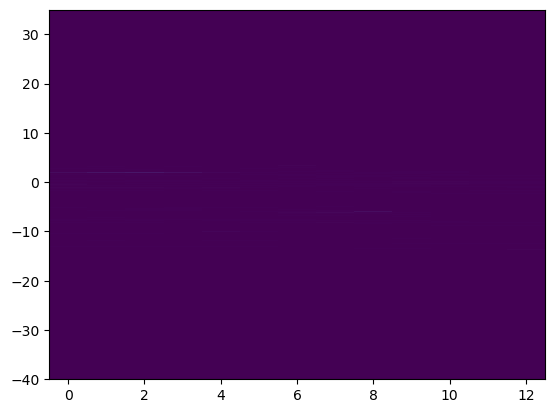

In [6]:
plt.pcolormesh(X, EE, DOS_TEST.T.real)

In [41]:
@gif.frame
def plot_standard():
    plt.pcolormesh(X, EE, DOS_TEST.T.real)

In [50]:
@gif.frame
def plot_gold(PATH, i):

    font = {'weight' : 'normal',
	'size'   : 35}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    
    DOS_TEST = np.loadtxt(PATH + 'DOS_' + str(i) + '.dat').view(complex)
    E = np.loadtxt(PATH + 'E.dat')
    EFL = np.loadtxt(PATH + 'EFL.dat')
    EFR = np.loadtxt(PATH + 'EFR.dat')
    x = np.arange(13)
    x_fl = np.linspace(-0.5, 11.55, 100)
    Efl_dotted = EFL[i+1] * np.ones((20))
    Efr_dotted = EFR[i+1] * np.ones((20))

    EE, X = np.meshgrid(E, x)
    
    plt.figure(figsize = (15,12))
    ax1 = plt.gca()
    ax1.set_xlabel('Transport Direction' + ' ' + r'$\mathbf{x}$' + ' ' + r'$ [\mathbf{u.c.}]$')
    ax1.set_ylabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.pcolormesh(X, EE, DOS_TEST.T.real, cmap = 'gist_heat_r', vmin = 0, vmax = 500)
    cbar = plt.colorbar(plot, format = ticker.FuncFormatter(fmt_1))
    cbar.ax.set_ylabel('DOS' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')

    ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    plt.text(0.00-0.40, EFL[i+1] + 0.05, r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.text(12.550-0.90, EFR[i+1] + 0.05 , r'$\mathbf{E_{FR}}$', fontsize = 27)
    plt.ylim(-8.6,  1.0)

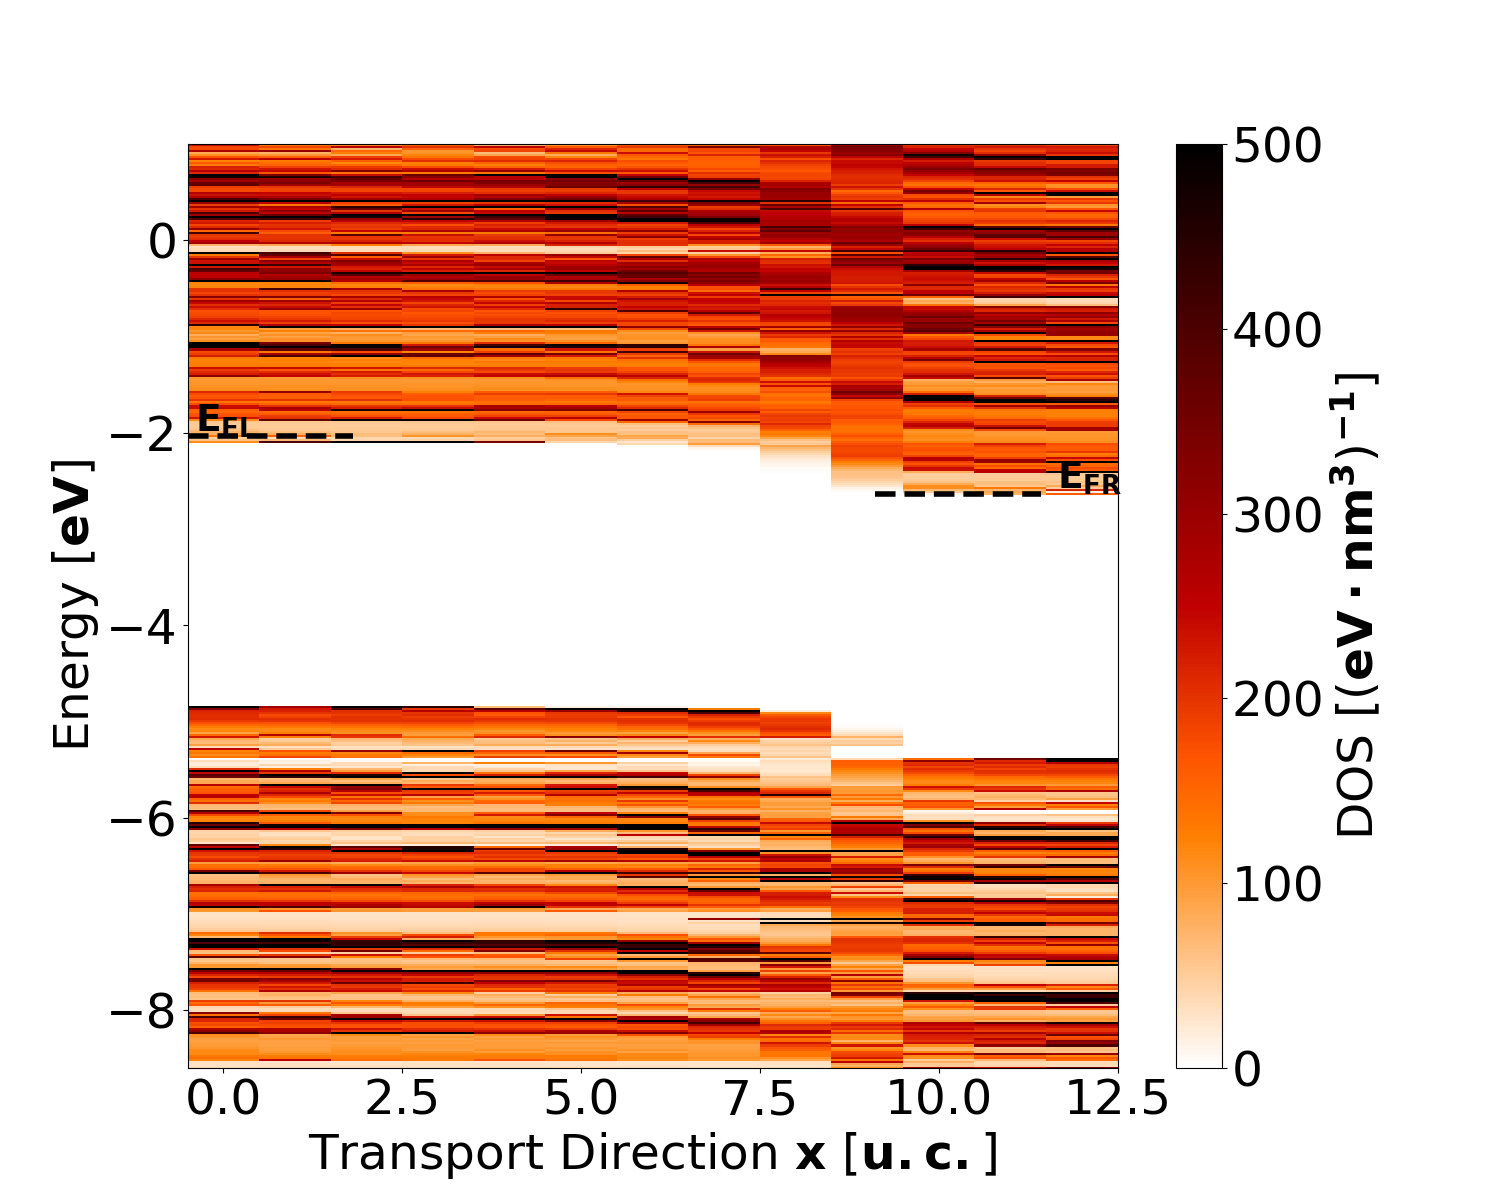

In [51]:
plot_gold(PATH, 0)

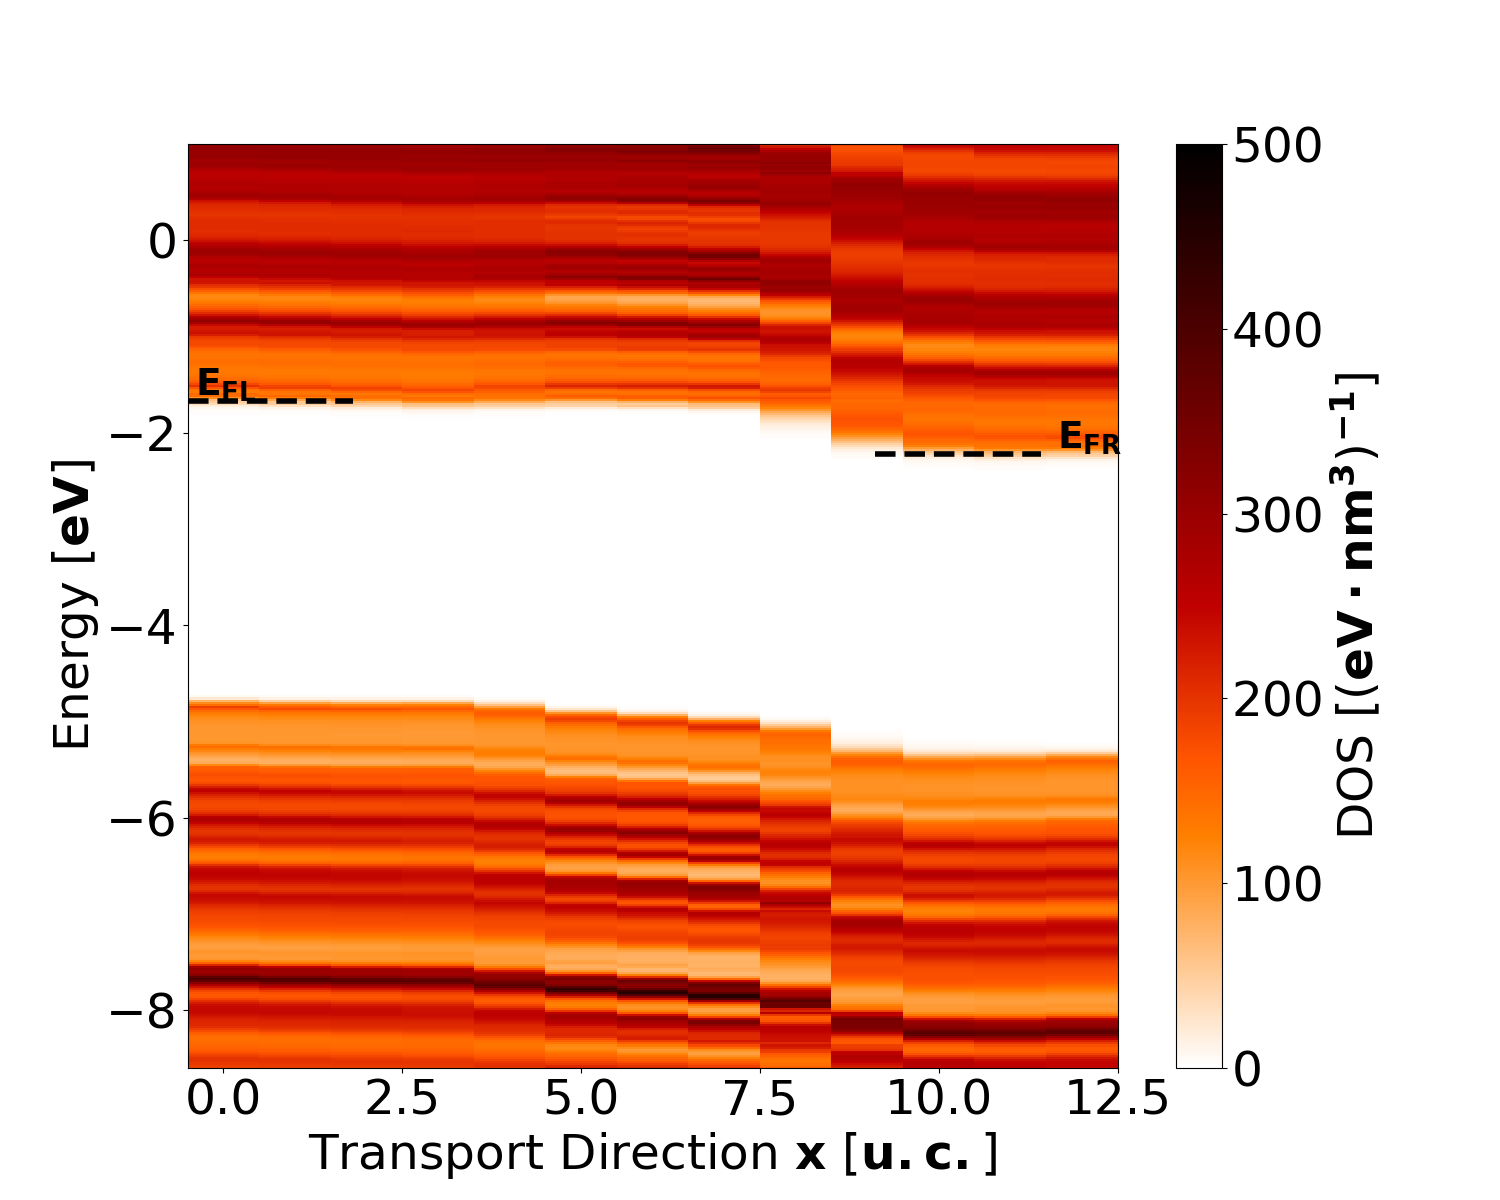

In [52]:
plot_gold(PATH, 499)

In [53]:
DOS_TEST_499 = np.loadtxt(PATH + 'DOS_499.dat').view(complex)

/home/dleonard/Documents/installs/miniconda3/envs/almaeder_mkl/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-7.0, 1.0)

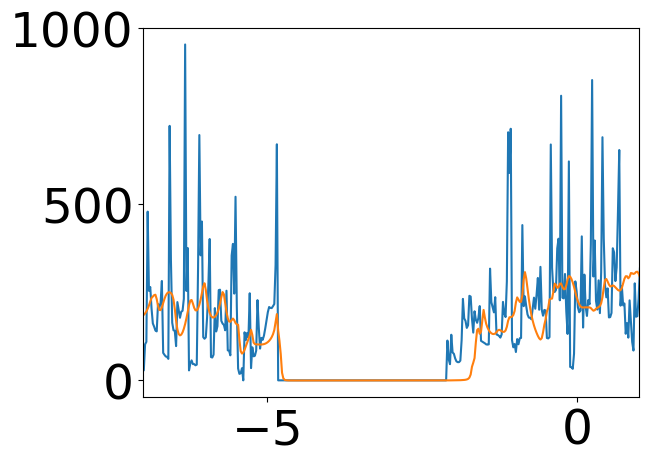

In [58]:
plt.plot(E,DOS_TEST[:,0])
plt.plot(E,DOS_TEST_499[:,0]-0.3687)
plt.xlim(-7, 1.0)

(-7.0, 1.0)

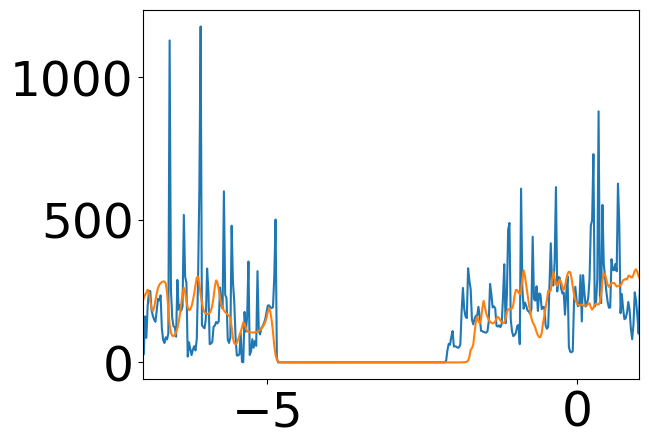

In [59]:
plt.plot(E,DOS_TEST[:,5])
plt.plot(E,DOS_TEST_499[:,5]-0.3687)
plt.xlim(-7, 1.0)

In [4]:
def plot_io(i):

    font = {'weight' : 'normal',
	'size'   : 35}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    
    DOS_TEST = np.loadtxt('DOS_' + str(i) + '.dat').view(complex)
    E = np.loadtxt('E.dat')
    EFL = np.loadtxt('EFL.dat')
    EFR = np.loadtxt('EFR.dat')
    x = np.arange(10)
    x_fl = np.linspace(-0.5, 11.55, 100)
    Efl_dotted = EFL[i+1] * np.ones((7))
    Efr_dotted = EFR[i+1] * np.ones((7))

    EE, X = np.meshgrid(E, x)
    
    fig = plt.figure(figsize = (13,12))
    ax1 = plt.gca()
    ax1.set_xlabel('Transport Direction' + ' ' + r'$\mathbf{x}$' + ' ' + r'$ [\mathbf{u.c.}]$')
    ax1.set_ylabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.pcolormesh(X, EE, DOS_TEST.T.real, cmap = 'gist_heat_r', vmin = 0, vmax = 250)
    cbar = plt.colorbar(plot, format = ticker.FuncFormatter(fmt_1))
    cbar.ax.set_ylabel('DOS' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')

    ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    plt.text(0.00+0.20, EFL[i] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.text(10.55-0.50, EFR[i] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)
    plt.ylim(-5, -3)
    return fig

In [ ]:
frames  = []
for i in range(200):
    fig = plot_io(i)
    canvas = FigureCanvas(fig)
    canvas.draw()
    image = np.array(canvas.renderer.buffer_rgba())

    frames.append(image)
    plt.clf()
    matplotlib.pyplot.close(fig)
imageio.mimsave('DOS_io.gif', frames, duration = 0.1)


In [234]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [48]:
@gif.frame
def plot_idE_gold(PATH, i):

    font = {'weight' : 'normal',
	'size'   : 28}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    


    def fmt_2(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        if b == 0:
            return r'${}$'.format(b)
        return r'$10^{{{}}}$'.format(b)
    
    IDE_TEST = np.loadtxt(PATH + 'IDE_' + str(i) + '.dat').view(complex)
    E = np.loadtxt(PATH + 'E.dat')
    EFL = np.loadtxt(PATH + 'EFL.dat')
    EFR = np.loadtxt(PATH + 'EFR.dat')
    uc_factor = 5.469 * 4
    x = np.arange(13)
    x_fl = np.linspace(uc_factor * -0.5, uc_factor * 12.45, 100)
    Efl_dotted = EFL[i+1] * np.ones((10))
    Efr_dotted = EFR[i+1] * np.ones((10))
    shift = EFL[250] - EFL[0]
    ampere_factor = 7.73 * 1e-5

    EE, X = np.meshgrid(E, x * uc_factor)

    BG_offset = np.concatenate((np.concatenate((np.zeros((3,)),np.arange(8) * 0.001)), 0.008 * np.ones((2,))))
    #BG_offset = np.zeros((13,))

    
    plt.figure(figsize = (16,12))
    ax1 = plt.gca()
    ax1.set_xlabel('Transport Direction' + ' ' + r'$\mathbf{x}$' + ' ' + r'$ [\mathbf{\AA}]$')
    ax1.set_ylabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    #plot = plt.pcolormesh(X , EE , IDE_TEST.T.real * ampere_factor, cmap = plt.cm.coolwarm, norm = colors.SymLogNorm(linthresh = 1e-6, linscale = 1, vmin = ampere_factor *-1e-0, vmax = ampere_factor * 1e-0), shading = 'auto')
    plot = plt.pcolormesh(X , EE , IDE_TEST.T.real * ampere_factor, cmap = plt.cm.coolwarm, shading = 'auto')
    cs = PchipInterpolator(x * uc_factor, Vpot1 + BG_offset- 1.72)
    x_pot = np.linspace(-1.0 * uc_factor, uc_factor * 12.45, 100)
    plt.plot(x_pot , cs(x_pot), label = r' Conduction Band Edge @ $V_g = 0.65 V$', color = 'g', linewidth = 4, linestyle = '-.')
    #plot = plt.pcolormesh(X, EE, IDE_TEST.T.real, cmap = plt.cm.coolwarm, vmin = -0.02, vmax = 0.02)
    #norm = colors.SymLogNorm(linthresh = 0.01, linscale = 0.01, vmin = -1.2, vmax = 1.2), shading = 'auto'
    cbar = plt.colorbar(plot, format = ticker.FuncFormatter(fmt_2))
    cbar.ax.set_ylabel('IDE' + ' ' + r'$[\mathbf{A \cdot \left( eV \right) ^{-1}}]$')

    ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    plt.text(uc_factor*(0.00-0.40), EFL[i+1]+0.025, r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.text(uc_factor*(12.55-0.99), EFR[i+1]-0.060, r'$\mathbf{E_{FR}}$', fontsize = 27)
    plt.ylim(-2.5, -1.0)
    plt.xlim(-0.5*uc_factor, 12.45*uc_factor)
    plt.legend()

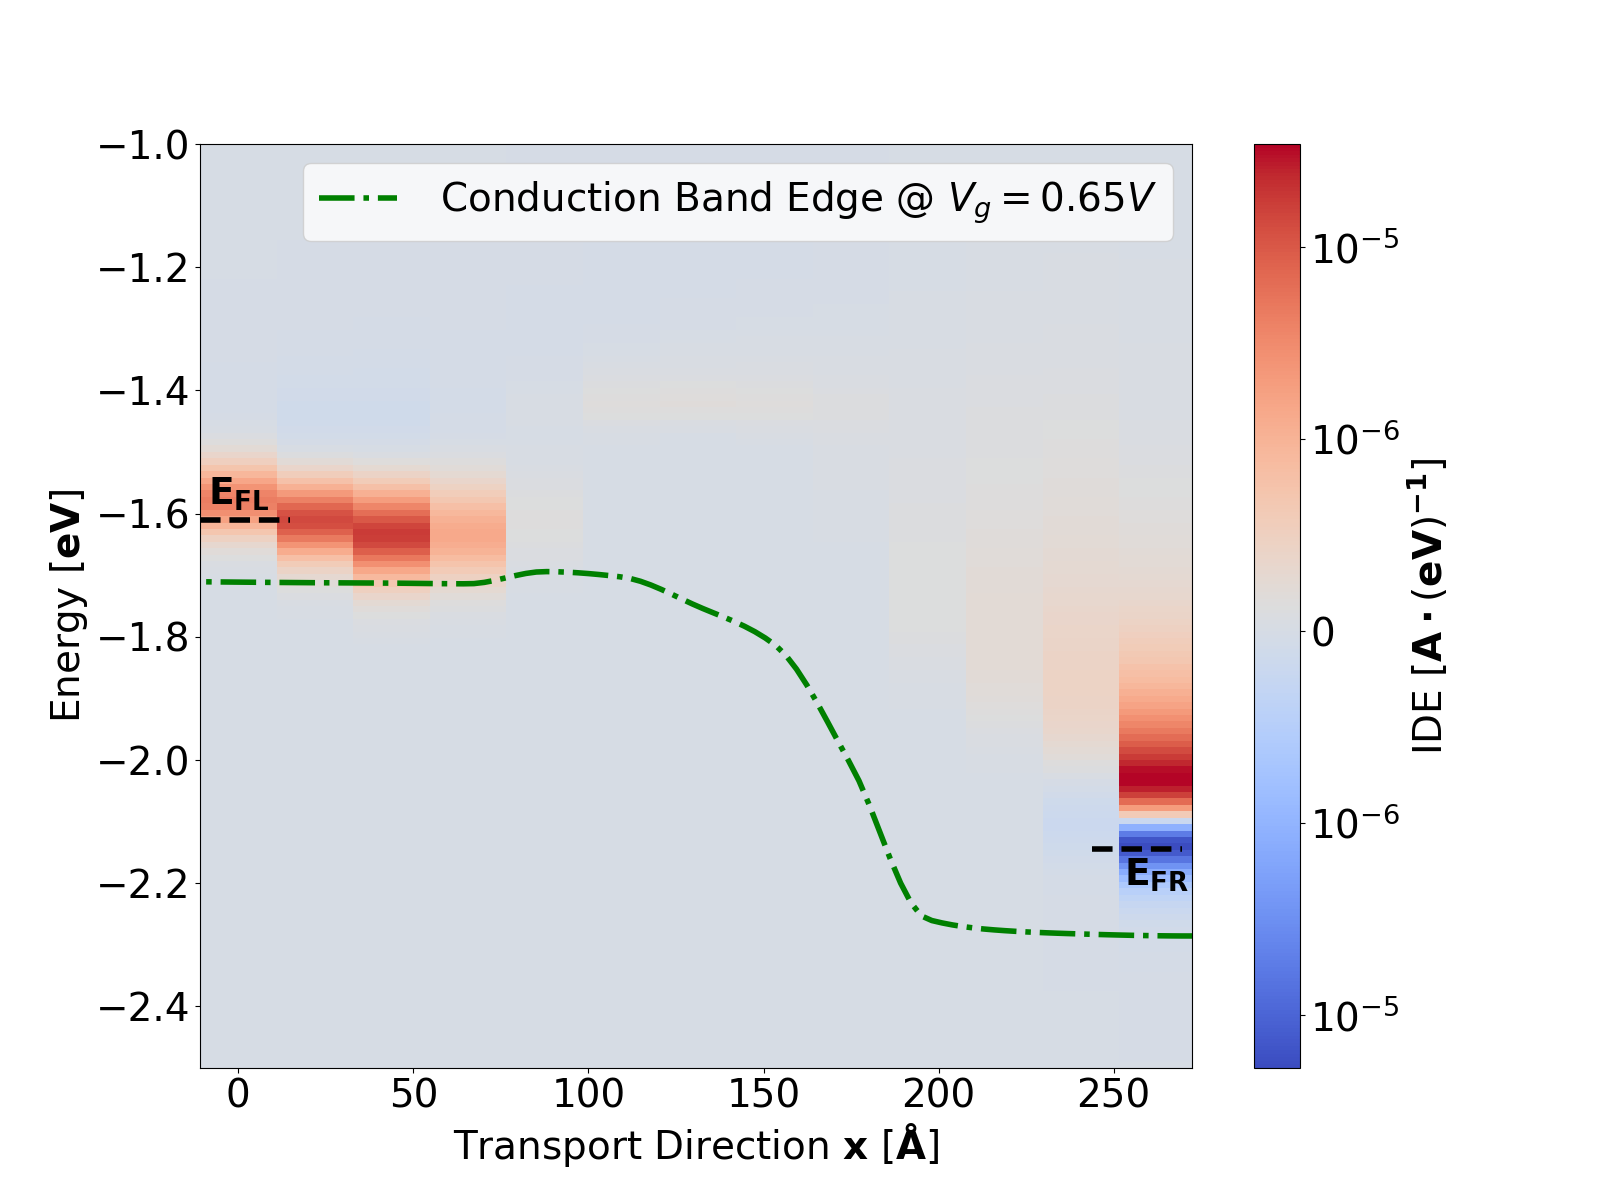

In [71]:
plot_idE_gold(PATH, 687)

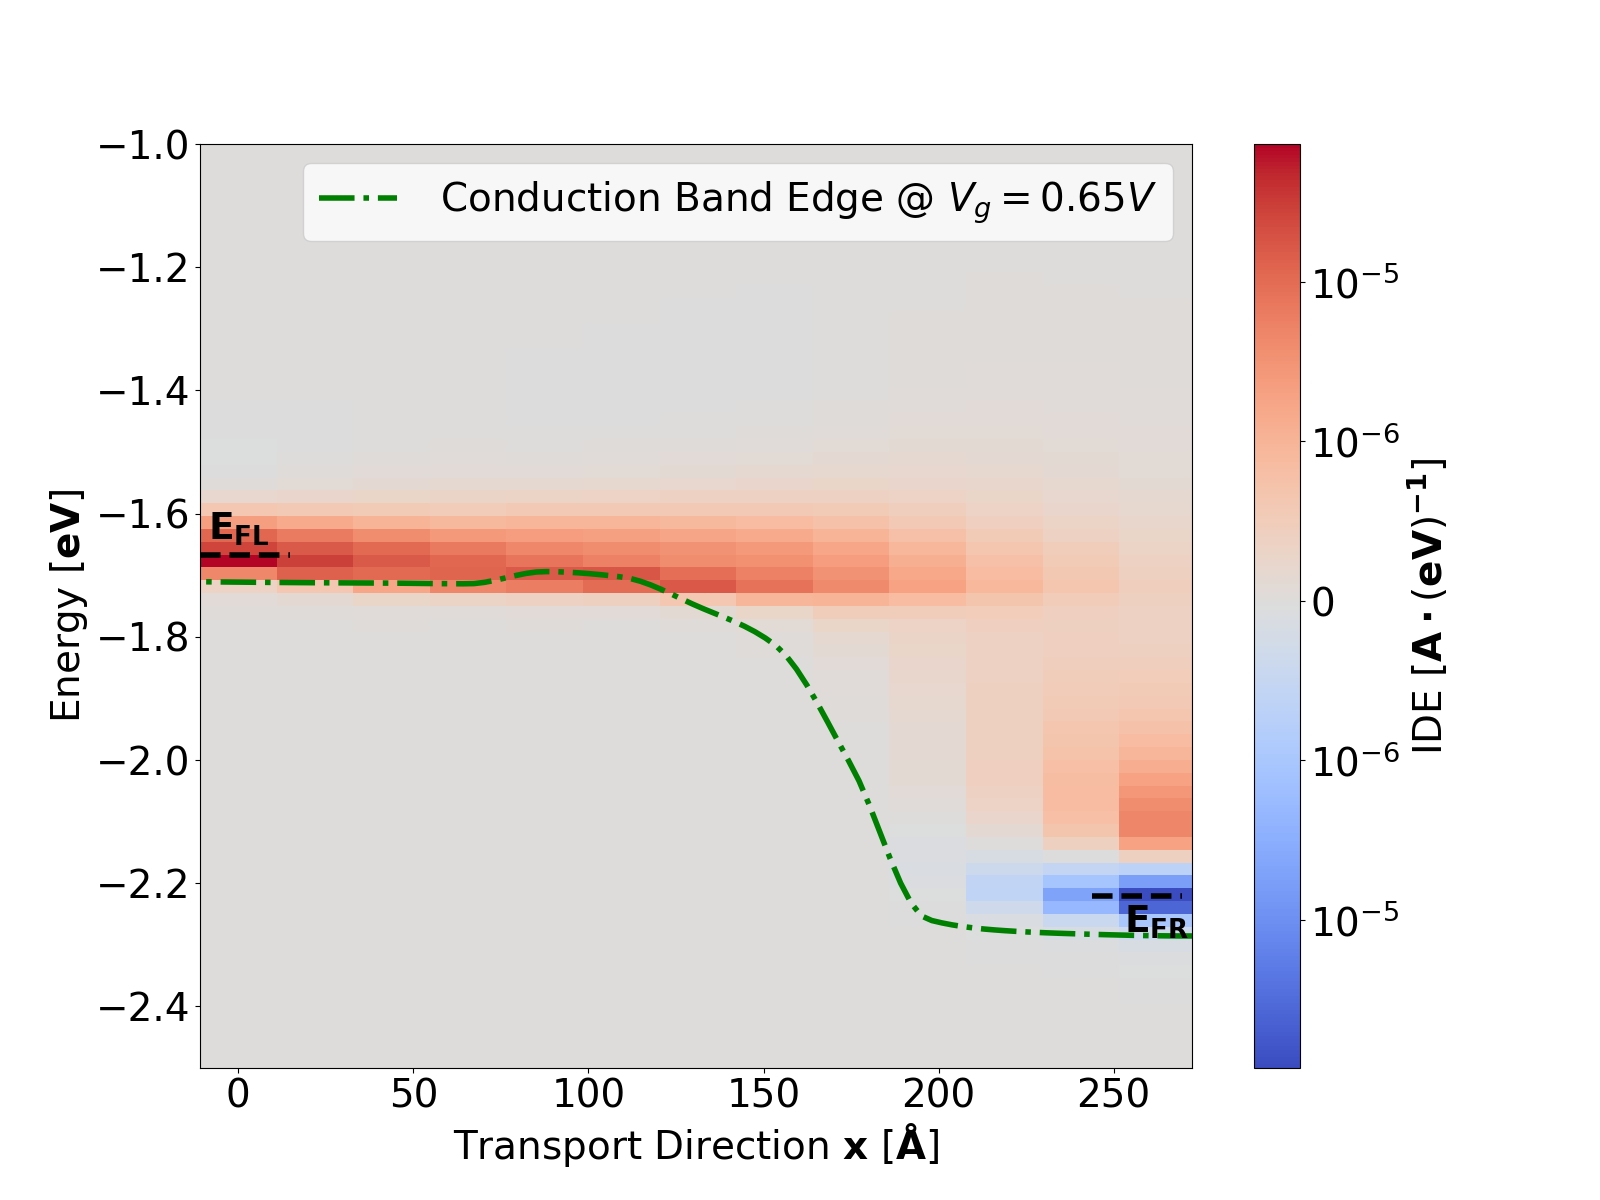

In [49]:
plot_idE_gold(PATH, 499)

In [39]:
ampere_factor

NameError: name 'ampere_factor' is not defined

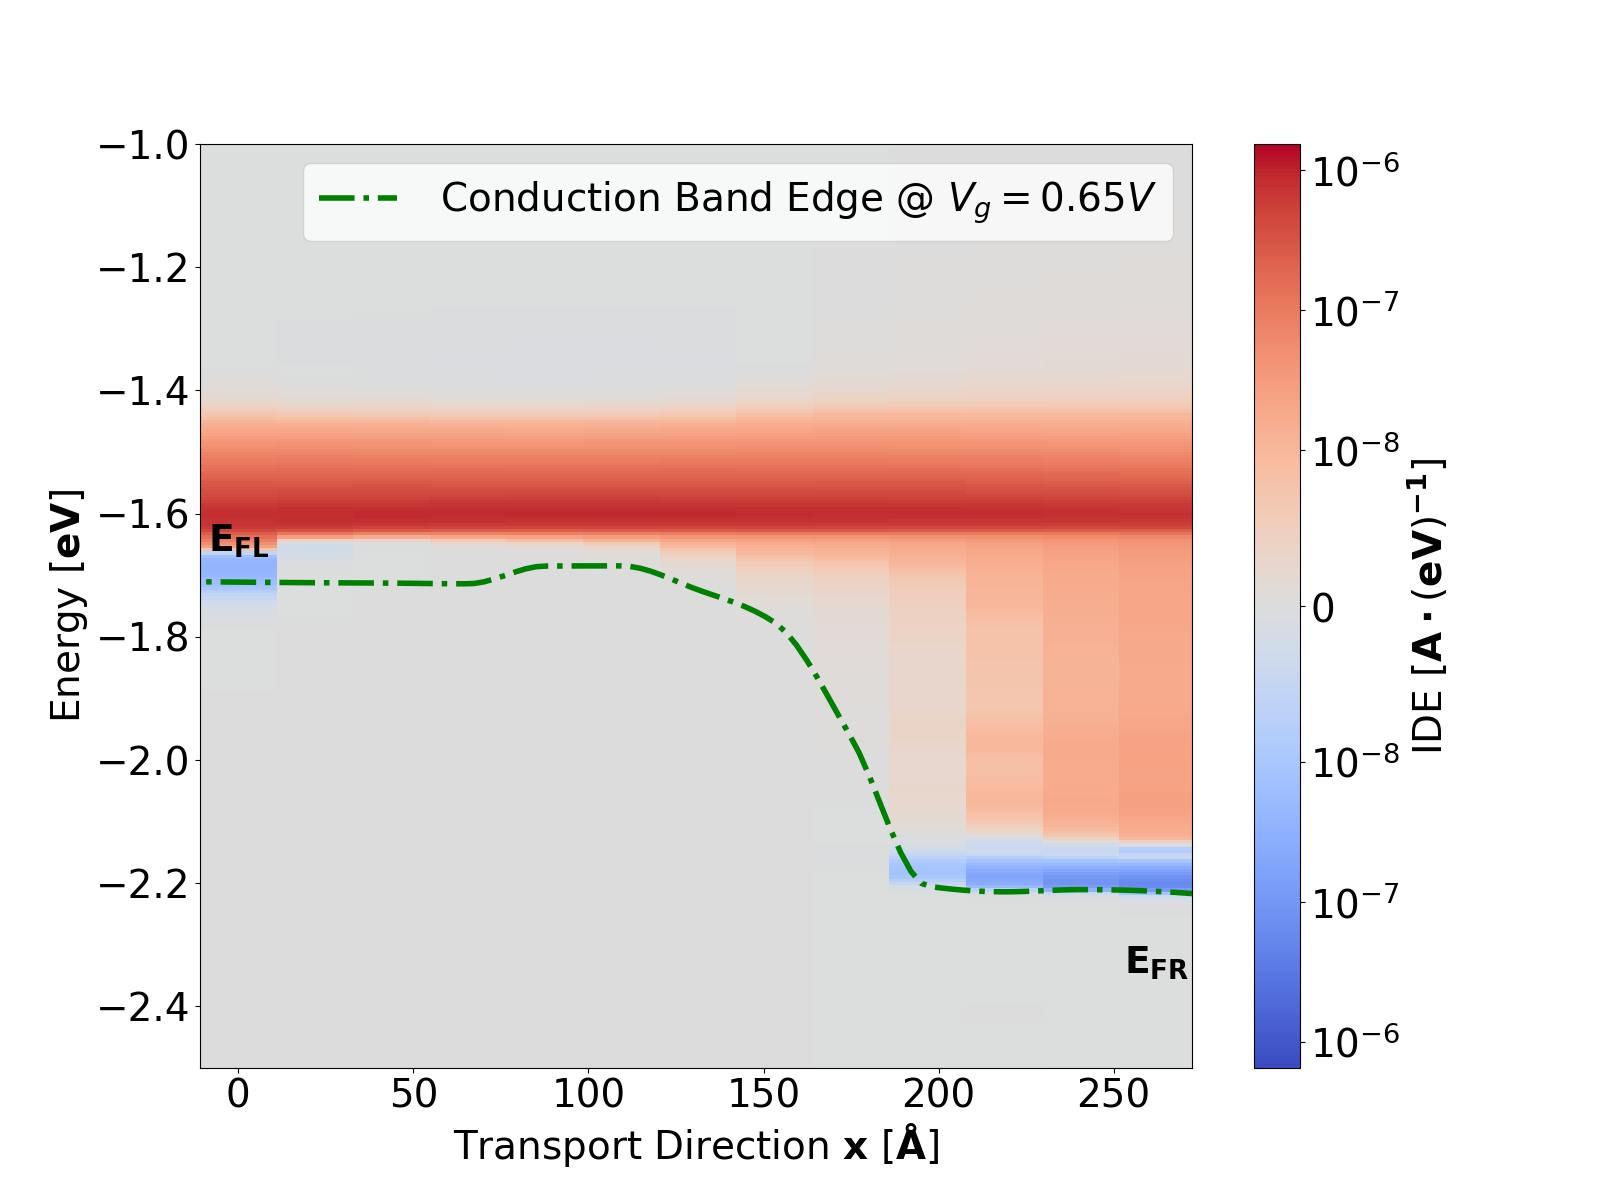

In [31]:
plot_idE_gold(PATH, 295)

In [24]:
Vpot1.shape

(12,)

In [213]:
@gif.frame
def plot_idE_gold_CNT(PATH, i):

    font = {'weight' : 'normal',
	'size'   : 28}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    


    def fmt_2(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        if b == 0:
            return r'${}$'.format(b)
        return r'$10^{{{}}}$'.format(b)
    
    IDE_TEST = np.loadtxt(PATH + 'IDE_' + str(i) + '.dat').view(complex)
    E = np.loadtxt(PATH + 'E.dat')
    EFL = np.loadtxt(PATH + 'EFL.dat')
    EFR = np.loadtxt(PATH + 'EFR.dat')
    uc_factor = 4.276 * 4
    x = np.arange(12)
    x_fl = np.linspace(uc_factor * -0.5, uc_factor * 11.45, 100)
    Efl_dotted = EFL[i+1] * np.ones((10))
    Efr_dotted = EFR[i+1] * np.ones((10))
    shift = EFL[i] - EFL[0]
    ampere_factor = 7.73 * 1e-5

    EE, X = np.meshgrid(E, x * uc_factor)

    BG_offset = np.concatenate((np.concatenate((np.zeros((3,)),np.arange(8) * 0.01)), 0.08 * np.ones((2,))))
    BG_offset = np.zeros((13,))

    
    plt.figure(figsize = (16,12))
    ax1 = plt.gca()
    ax1.set_xlabel('Transport Direction' + ' ' + r'$\mathbf{x}$' + ' ' + r'$ [\mathbf{\AA}]$')
    ax1.set_ylabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.pcolormesh(X , EE, IDE_TEST.T.real * ampere_factor, cmap = plt.cm.coolwarm, shading = 'auto', vmin = -2e-6, vmax = 2e-6) # norm = colors.SymLogNorm(linthresh = 1e-7, linscale = 1, vmin = ampere_factor *-2e-1, vmax = ampere_factor * 2e-1), shading = 'auto')
    cs = PchipInterpolator(x * uc_factor, Vpot1)
    x_pot = np.linspace(-1.0 * uc_factor, uc_factor * 11.45, 100)
    y_pot = np.concatenate((-3.53 * np.ones((17,)),np.linspace(-3.53, -3.73, 66), -3.73 * np.ones((17,))))
    #y_pot = cs(x_pot)
    #print(y_pot)
    plt.plot(x_pot , y_pot, label = r' Conduction Band Edge', color = 'g', linewidth = 4, linestyle = '-.')
    #plot = plt.pcolormesh(X, EE, IDE_TEST.T.real, cmap = plt.cm.coolwarm, vmin = -0.02, vmax = 0.02)
    #norm = colors.SymLogNorm(linthresh = 0.01, linscale = 0.01, vmin = -1.2, vmax = 1.2), shading = 'auto'
    cbar = plt.colorbar(plot, format = ticker.FuncFormatter(fmt))
    cbar.ax.set_ylabel('IDE' + ' ' + r'$[\mathbf{A \cdot \left( eV \right) ^{-1}}]$')

    ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    plt.text(uc_factor*(0.00-0.40), EFL[i+1]+0.015, r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.text(uc_factor*(11.55-0.99), EFR[i+1]+0.025, r'$\mathbf{E_{FR}}$', fontsize = 27)
    plt.ylim(-4.0, -3.2)
    plt.xlim(-0.5*uc_factor, 11.45*uc_factor)
    plt.legend()

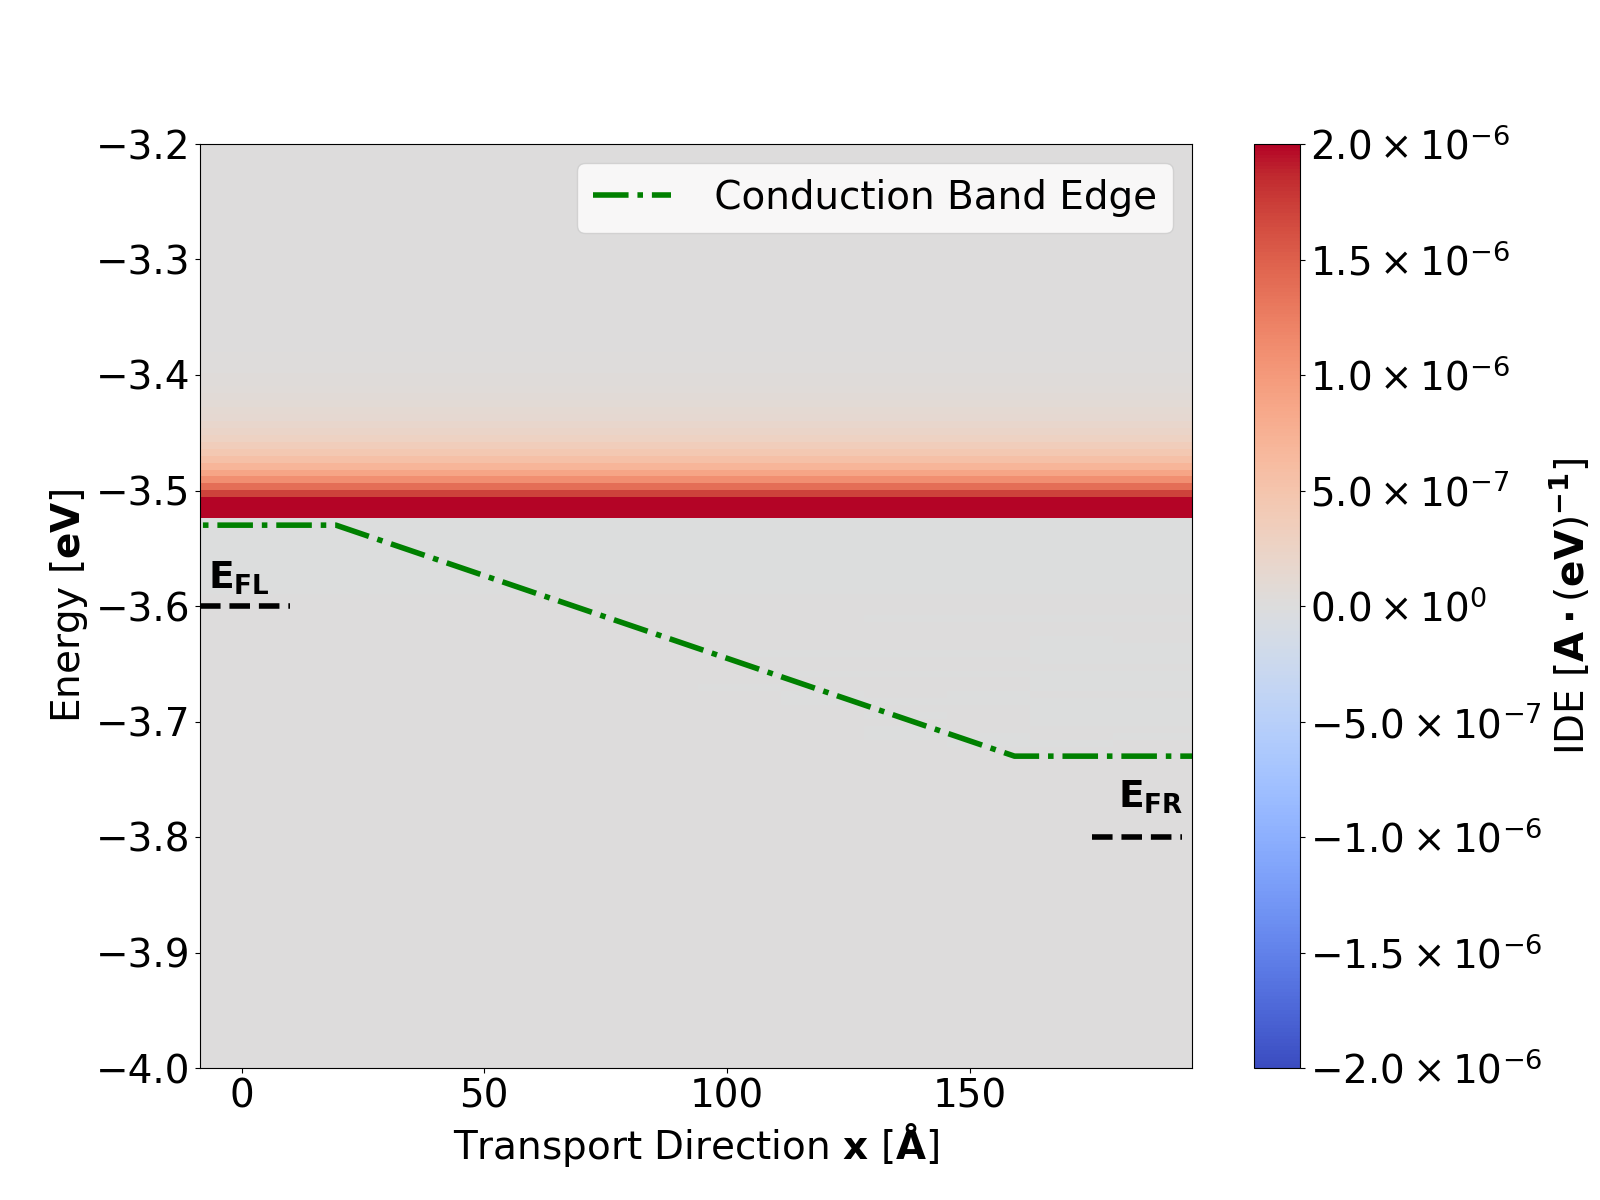

In [214]:
plot_idE_gold_CNT(PATH, 0)

Conservation condition satisfied at iteration 0
Conservation condition satisfied at iteration 436
Conservation condition satisfied at iteration 437
Conservation condition satisfied at iteration 438
Conservation condition satisfied at iteration 439
Conservation condition satisfied at iteration 440
Conservation condition satisfied at iteration 441
Conservation condition satisfied at iteration 442
Conservation condition satisfied at iteration 443
Conservation condition satisfied at iteration 444
Conservation condition satisfied at iteration 445
Conservation condition satisfied at iteration 446
Conservation condition satisfied at iteration 447
Conservation condition satisfied at iteration 448
Conservation condition satisfied at iteration 449
Conservation condition satisfied at iteration 450
Conservation condition satisfied at iteration 451
Conservation condition satisfied at iteration 452
Conservation condition satisfied at iteration 453
Conservation condition satisfied at iteration 454
Co

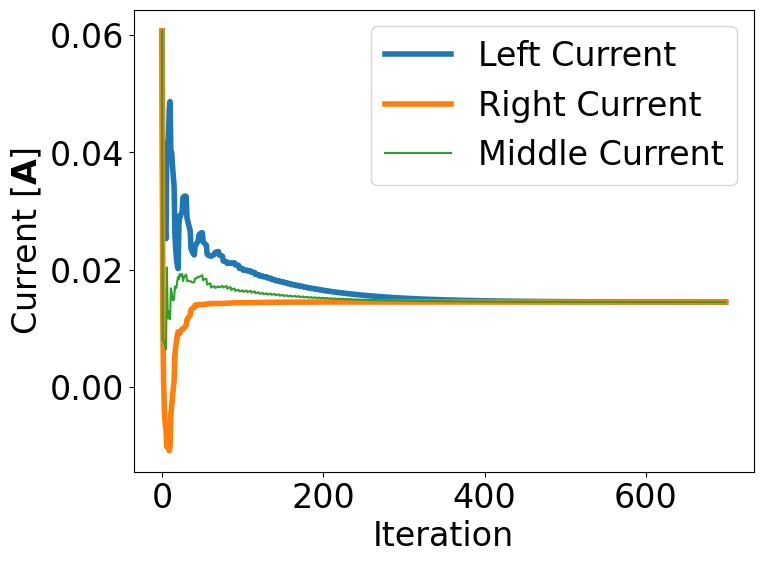

the best converged iteration is  599


In [74]:
num_iter = 700
nblocks = 7
font = {'weight' : 'normal',
'size'   : 24}
matplotlib.rc('font', **font)

ID_L = np.zeros((num_iter)) # left current
ID_R = np.zeros((num_iter)) # right current
ID_M = np.zeros((num_iter)) # middle current
conservation_cond = np.zeros((num_iter))
E = np.loadtxt(PATH + 'E.dat')
dE = E[1] - E[0]
for i in range(num_iter):
    IDE_temp = np.loadtxt(PATH + 'IDE_' + str(i) + '.dat').view(complex)
    ID_L[i] = np.sum(IDE_temp.real, axis = 0)[0] * dE
    ID_R[i] = np.sum(IDE_temp.real, axis = 0)[-2] * dE
    ID_M[i] = np.sum(IDE_temp.real, axis = 0)[nblocks//2] * dE

    conservation_cond[i] = (ID_L[i]-ID_R[i])/(ID_R[i])
    if np.abs(conservation_cond[i]) < 0.01:
        print('Conservation condition satisfied at iteration', i)

plt.figure(figsize=(8,6))
plt.plot(np.arange(num_iter), ID_L, label = 'Left Current', linewidth = 4)
plt.plot(np.arange(num_iter), ID_R, label = 'Right Current', linewidth = 4)
plt.plot(np.arange(num_iter), ID_M, label = 'Middle Current')
plt.xlabel('Iteration')
plt.ylabel('Current' + ' ' + r'$[\mathbf{A}]$')
plt.legend()
#plt.ylim([-1e-8, 1e-8])
plt.show()

print("the best converged iteration is ", np.argmin(np.abs(conservation_cond[100:])))


In [66]:
ID_L[0] * 7.73 * 1e-5

4.696139045574024e-06

In [70]:
ID_L[-4]* 7.73 * 1e-5

-3.493801057614577e-07

In [11]:
conservation_cond[249]

-0.0001390837723396774

In [50]:
PATH1 = '/usr/scratch/mont-fort17/dleonard/GW_paper/CNT_32/linear_results/CNT_biased_selfv_offdiag_1.5/'

(-4.5, 0.0)

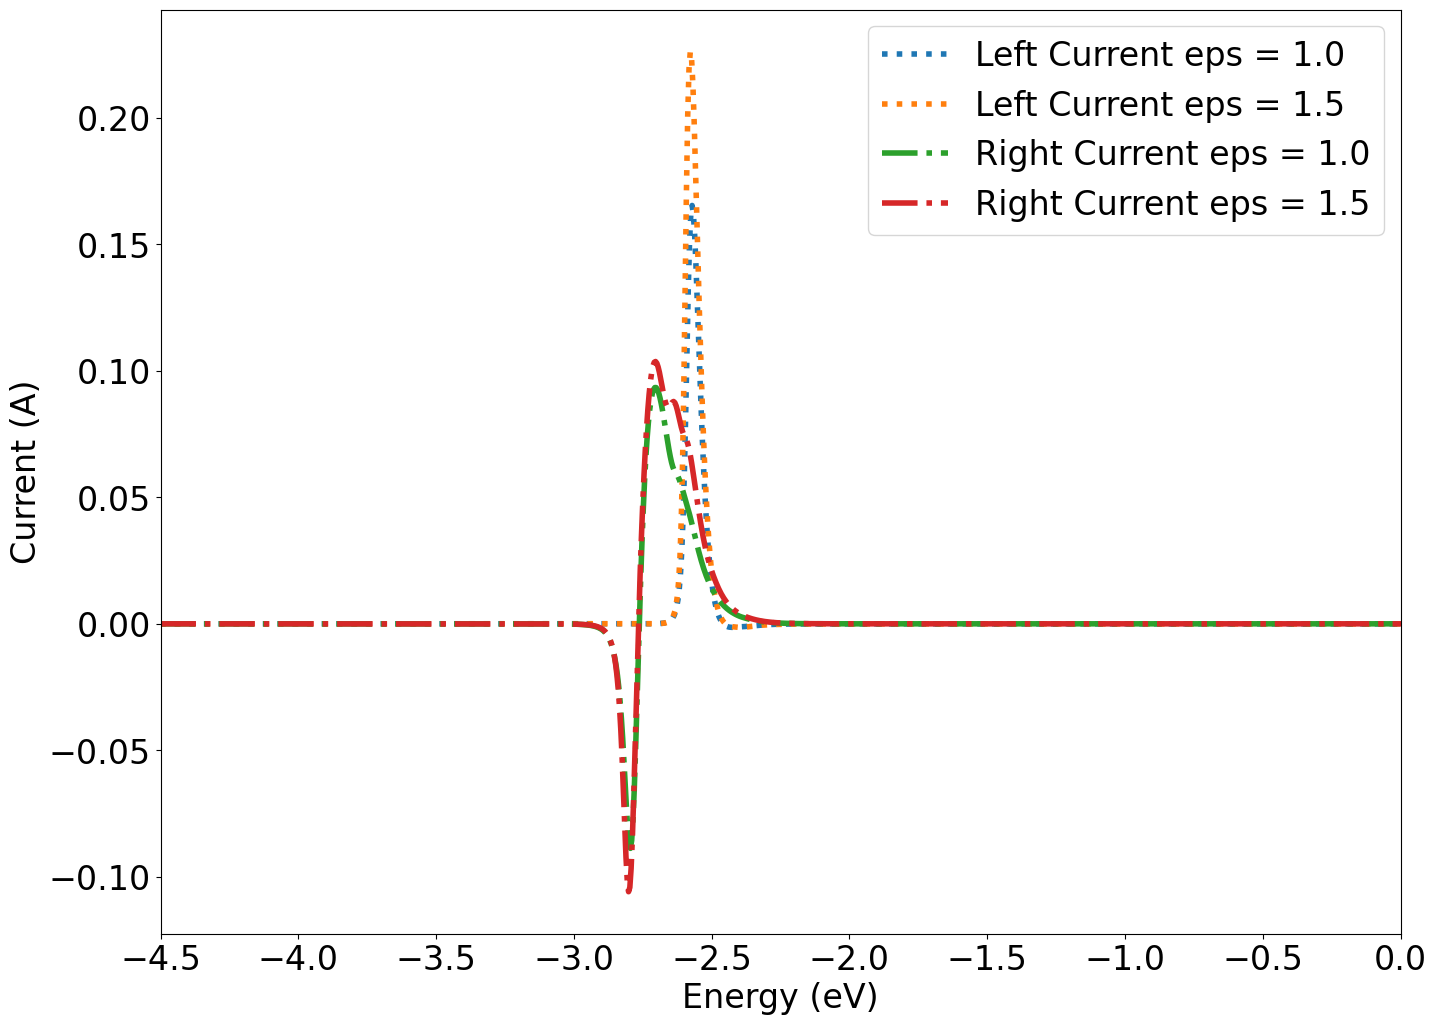

In [78]:
iter = 99
font = {'weight' : 'normal',
'size'   : 24}
matplotlib.rc('font', **font)
IDE_temp = np.loadtxt(PATH + 'IDE_' + str(iter) + '.dat').view(complex)
IDE_temp1 = np.loadtxt(PATH1 + 'IDE_' + str(iter-15) + '.dat').view(complex)
plt.figure(figsize = (16, 12))
plt.plot(E, IDE_temp.real[:,0], label = 'Left Current eps = 1.0', linewidth = 4, linestyle = ':')
plt.plot(E+0.278, IDE_temp1.real[:,0], label = 'Left Current eps = 1.5', linewidth = 4, linestyle = ':')
# plt.plot(E, IDE_temp.real[:,1], label = 'Left Current', linewidth = 4)
# plt.plot(E, IDE_temp.real[:,3], label = 'Left Current', linewidth = 4)
# plt.plot(E, IDE_temp.real[:,5], label = 'Left Current', linewidth = 4)
# plt.plot(E, IDE_temp.real[:,7], label = 'Left Current', linewidth = 4)
plt.plot(E, IDE_temp.real[:,-1], label = 'Right Current eps = 1.0', linewidth = 4, linestyle = 'dashdot')
plt.plot(E+0.278, IDE_temp1.real[:,-1], label = 'Right Current eps = 1.5', linewidth = 4, linestyle = 'dashdot')
plt.xlabel('Energy (eV)')
plt.ylabel('Current (A)')
plt.legend()
plt.xlim(-4.5, 0)

In [176]:
def plot_idE_rvl_compare(PATHs, legends, linestyles, biases, ball_scaling = None):

    font = {'weight' : 'normal',
	'size'   : 35}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)

    plt.figure(figsize = (12,8))
    ax1 = plt.gca()
    ax1.set_ylabel('IdE' + ' ' + r'$[\mathbf{A \cdot \left( eV\cdot nm ^2 \right) ^{-1}}]$')
    ax1.set_xlabel('Energy' + ' '  + r'$[\mathbf{eV}]$')

    x = np.arange(10)
    x_fl = np.linspace(-0.5, 9.55, 100)

    y_lim = 80
    
    plt.ylim(-0.05, 0.05)
    plt.xlim(-4.25, -3.0)
    if ball_scaling == None:
        ball_scaling = np.ones((len(PATHs),))

    
    curve = 0
    for path, legend, linestyle, i in zip(PATHs, legends, linestyles, biases):    
        IdE_temp = np.loadtxt(path + 'IDE_' + str(i) + '.dat').view(complex)
        E = np.loadtxt(path + 'E.dat')
        EFL = np.loadtxt(path + 'EFL.dat')
        EFR = np.loadtxt(path + 'EFR.dat')
        shift = EFL[i+1] - EFL[0]
        plt.plot(E-shift, ball_scaling[curve] * IdE_temp.T.real[0,:], linewidth = 4, label = "Left "  + legend, linestyle = linestyle)
        plt.plot(E-shift, ball_scaling[curve] * IdE_temp.T.real[-1,:], linewidth = 4, label = "Right " + legend, linestyle = linestyle)
        print(np.sum(IdE_temp.T.real[0,:]) * (E[1] - E[0]))
        print(np.sum(IdE_temp.T.real[-1,:]) * (E[1] - E[0]))
        curve +=1


    plt.plot(EFL[0]*np.ones((100,)), np.linspace(0, y_lim, 100), color = 'black', linestyle = 'dashed', linewidth = '4', label = 'Fermi Level')
    plt.plot(EFR[0]*np.ones((100,)), np.linspace(0, y_lim, 100), color = 'black', linestyle = 'dashed', linewidth = '4')


    plt.legend(loc = 'right', fontsize = 15)
    plt.show()

    #ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    #ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    #plt.text(0.00+0.20, EFL[i] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    #plt.text(8.55-0.50, EFR[i] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)

0.0012232095858917902
0.0012232095859147562
0.0010360441604612201
0.0010360443520832448
0.0010059154102913948
0.0010059118045223144
0.0009495246876756464
0.0009516408287201236
0.0009969988815513495
0.001022048510266864


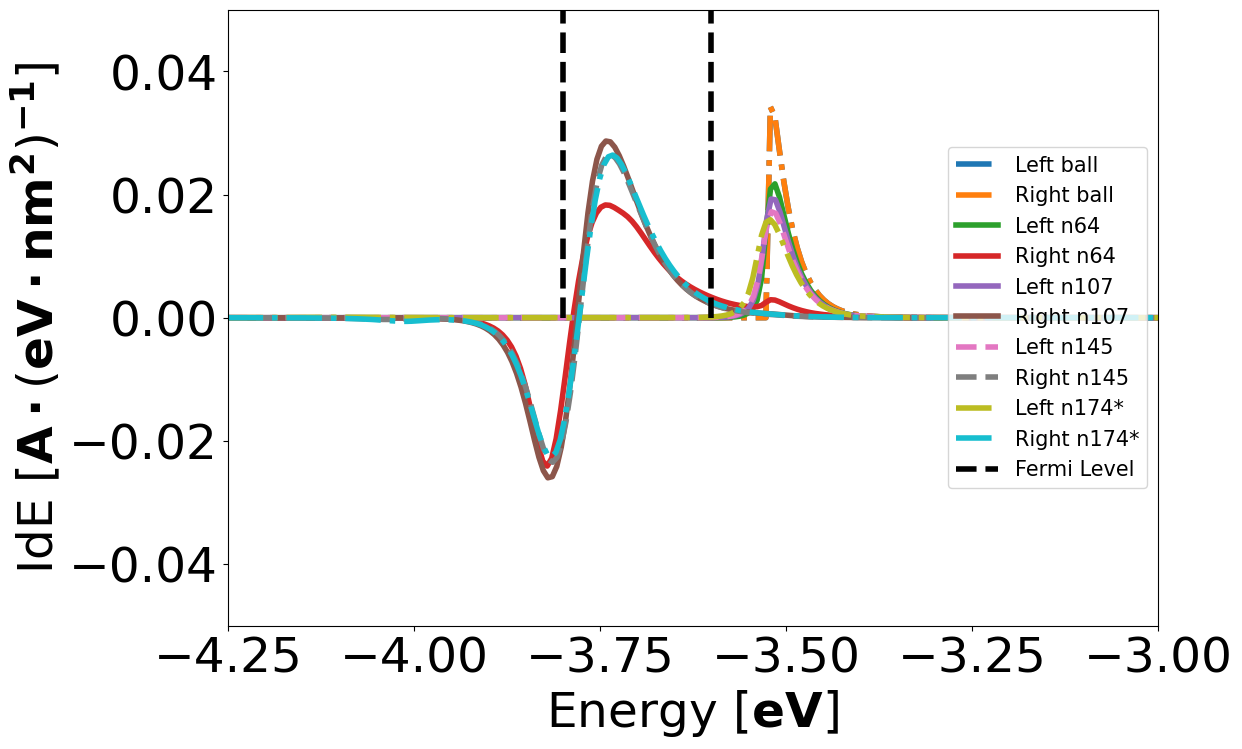

In [216]:
Paths = ['/usr/scratch/tortin19/dleonard/daint_results/CNT_biased_cf_epsR1_n64/'
    ,'/usr/scratch/tortin19/dleonard/daint_results/CNT_biased_cf_epsR1_n64/'
    ,'/usr/scratch/tortin19/dleonard/daint_results/CNT_biased_cf_epsR1_n107/'
        ,'/usr/scratch/tortin19/dleonard/daint_results/CNT_biased_cf_epsR1_n145/'
         ,'/usr/scratch/tortin19/dleonard/daint_results/CNT_biased_SC_BB1_epsR1_n174/']

legends = [ 'ball', 'n64', 'n107', 'n145', 'n174*']
linestyles = ['dashdot', 'solid', 'solid', 'dashed', 'dashdot']
iters = [0, 249, 500, 450, 500]
plot_idE_rvl_compare(Paths, legends, linestyles, iters)

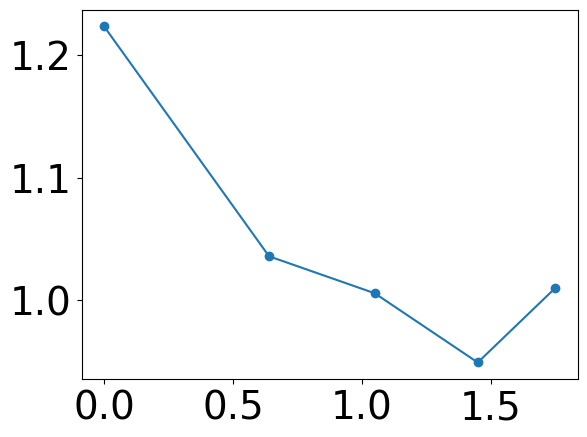

In [215]:
dist = np.array([0.0, 0.64, 1.05, 1.45, 1.75])
curr_mag = np.array([1.2232, 1.036, 1.0059, 0.9495, 1.01])
plt.plot(dist, curr_mag, marker = 'o')

0.0012232095858917902
0.0012232095859147562
0.0010360441604612201
0.0010360443520832448
0.001029252786634593
0.001028200675526169
0.0010059154102913948
0.0010059118045223144
0.0009495217754801191
0.0009495130684777549
0.0007493178053358704
0.0007531434101799016


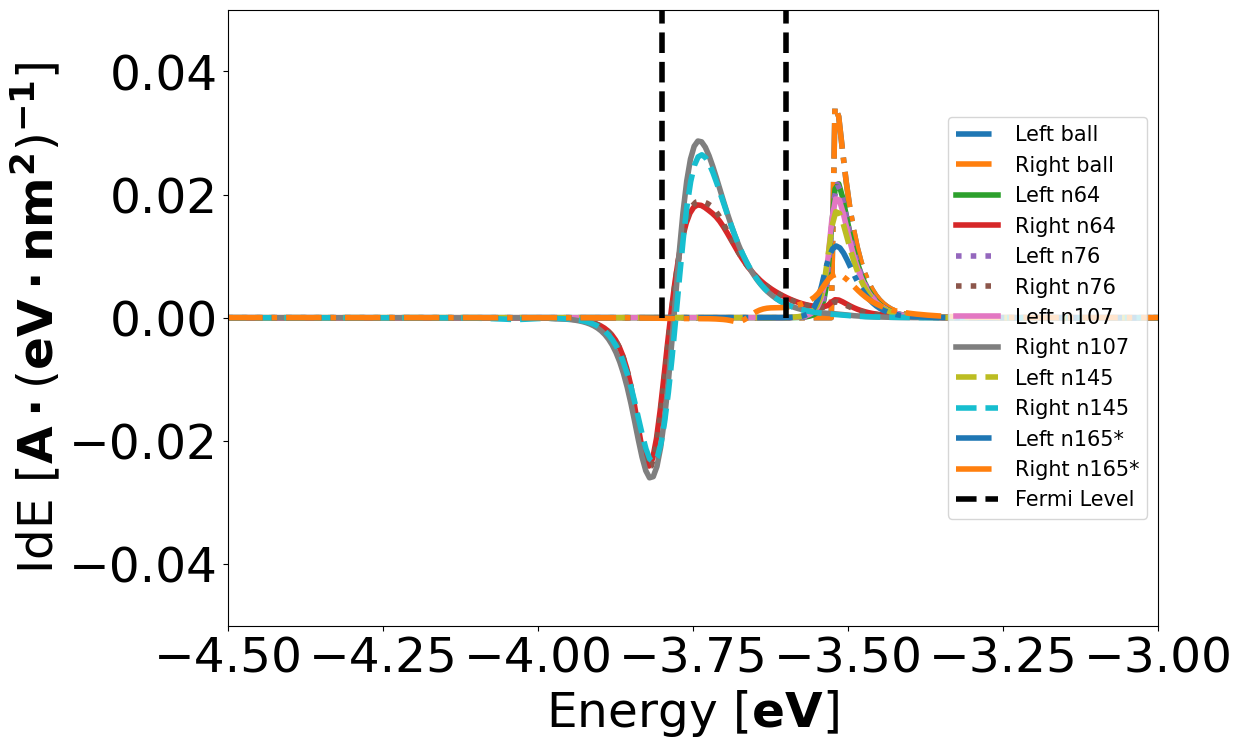

In [160]:
Paths = ['/usr/scratch/tortin19/dleonard/daint_results/CNT_biased_cf_epsR1_n64/'
    ,'/usr/scratch/tortin19/dleonard/daint_results/CNT_biased_cf_epsR1_n64/'
    ,'/usr/scratch/tortin19/dleonard/daint_results/CNT_biased_cf_epsR1_n76/'
    ,'/usr/scratch/tortin19/dleonard/daint_results/CNT_biased_cf_epsR1_n107/'
        ,'/usr/scratch/tortin19/dleonard/daint_results/CNT_biased_cf_epsR1_n145/'
         ,'/usr/scratch/tortin19/dleonard/daint_results/CNT_biased_SC_BB1_epsR1_n165/']

legends = [ 'ball', 'n64', 'n76', 'n107', 'n145', 'n165*']
linestyles = ['dashdot', 'solid', 'dotted', 'solid', 'dashed', 'dashdot']
iters = [0, 249, 320, 500, 599, 163]
plot_idE_rvl_compare(Paths, legends, linestyles, iters)

In [34]:
def plot_idE_rvl_compare_2axis(PATHs, legends, linestyles, biases, ball_scaling = None):

    font = {'weight' : 'normal',
	'size'   : 28}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)

    plt.figure(figsize = (12,8))
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    ax1.set_ylabel('IdE' + ' ' + r'$[\mathbf{A \cdot \left( eV\right) ^{-1}}]$')
    ax1.set_xlabel('Energy' + ' '  + r'$[\mathbf{eV}]$')

    x = np.arange(10)
    x_fl = np.linspace(-0.5, 9.55, 100)

    y_lim = 80
    
    plt.ylim(-0.05, 0.05)
    ax2.set_ylabel('IdE' + ' ' + r'$[\mathbf{A \cdot \left( eV\right) ^{-1}}]$')
    ax2.set_ylim([-0.0003, 0.0016])
    ax1.set_ylim([-0.0075, 0.04])
    plt.xlim(-2.8, -1.5)
    if ball_scaling == None:
        ball_scaling = np.ones((len(PATHs),))

    
    curve = 0
    # for path, legend, linestyle, i in zip(PATHs, legends, linestyles, biases):    
    IdE_temp = np.loadtxt(PATHs[0] + 'IDE_' + str(biases[0]) + '.dat').view(complex)
    E = np.loadtxt(PATHs[0] + 'E.dat')
    EFL = np.loadtxt(PATHs[0]+ 'EFL.dat')
    EFR = np.loadtxt(PATHs[0] + 'EFR.dat')
    shift = EFL[biases[0]+1] - EFL[0]
    ax1.plot(E-shift, ball_scaling[curve] * IdE_temp.T.real[0,:], linewidth = 4, label = "Ballistic", linestyle = linestyles[0], color = 'gray')
    #ax1.plot(E-shift, ball_scaling[curve] * IdE_temp.T.real[-1,:], linewidth = 4, label = "Right " + legends[0], linestyle =  linestyles[0])

    IdE_temp = np.loadtxt(PATHs[0] + 'IDE_' + str(biases[1]) + '.dat').view(complex)
    E = np.loadtxt(PATHs[1] + 'E.dat')
    EFL = np.loadtxt(PATHs[1] + 'EFL.dat')
    EFR = np.loadtxt(PATHs[1] + 'EFR.dat')
    shift = EFL[biases[1]+1] - EFL[0]
    ax2.plot(E-shift, ball_scaling[curve] * IdE_temp.T.real[0,:], linewidth = 4, label = "scGW Left", linestyle = 'dashdot')
    ax2.plot(E-shift, ball_scaling[curve] * IdE_temp.T.real[6,:], linewidth = 4, label = "scGW Channel", linestyle = 'dashdot')
    ax2.plot(E-shift, ball_scaling[curve] * IdE_temp.T.real[-1,:], linewidth = 4, label = "scGW Right" , linestyle = 'dashdot')






    print(np.sum(IdE_temp.T.real[0,:]) * (E[1] - E[0]))
    print(np.sum(IdE_temp.T.real[-1,:]) * (E[1] - E[0]))
    curve +=1


    ax1.plot(EFL[0]*np.ones((100,)), np.linspace(0, y_lim, 100), color = 'black', linestyle = 'dotted', linewidth = '2', label = 'Fermi Levels')
    ax1.plot(EFR[0]*np.ones((100,)), np.linspace(0, y_lim, 100), color = 'black', linestyle = 'dotted', linewidth = '2')

    plt.ticklabel_format(axis = 'y', scilimits=(-3,3))
    plt.legend(loc = 'upper left', fontsize = 25)
    ax1.legend(loc = 'upper right', fontsize = 25)
    plt.show()

    #ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    #ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    #plt.text(0.00+0.20, EFL[i] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    #plt.text(8.55-0.50, EFR[i] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)

In [143]:
Paths = ['/usr/scratch/tortin19/dleonard/daint_results/Si_NW_14000_27_SC_eps5/',
         '/usr/scratch/tortin19/dleonard/daint_results/Si_NW_14000_27_SC_eps5/']
legends = ['ballistic', 'gw']
linestyles = ['solid', 'dashed']
ball_scaling = [1/10, 1]
iters = [0, 250]

0.0007411349259331587
0.0007411786065981868


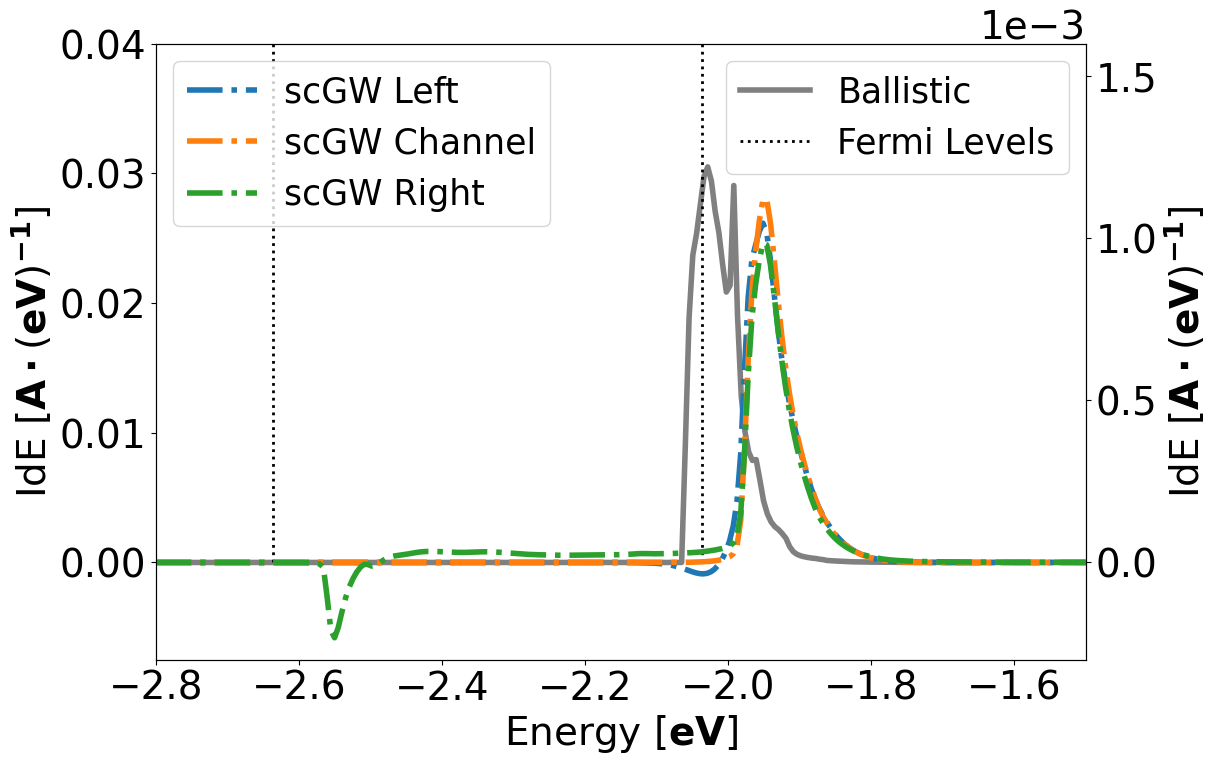

In [144]:
plot_idE_rvl_compare_2axis(Paths, legends, linestyles, iters, ball_scaling)

Conservation condition satisfied at iteration 0
Conservation condition satisfied at iteration 445
Conservation condition satisfied at iteration 446
Conservation condition satisfied at iteration 447
Conservation condition satisfied at iteration 448
Conservation condition satisfied at iteration 449
Conservation condition satisfied at iteration 450
Conservation condition satisfied at iteration 451
Conservation condition satisfied at iteration 452
Conservation condition satisfied at iteration 453
Conservation condition satisfied at iteration 454
Conservation condition satisfied at iteration 455
Conservation condition satisfied at iteration 456
Conservation condition satisfied at iteration 457
Conservation condition satisfied at iteration 458
Conservation condition satisfied at iteration 459
Conservation condition satisfied at iteration 460
Conservation condition satisfied at iteration 461
Conservation condition satisfied at iteration 462
Conservation condition satisfied at iteration 463
Co

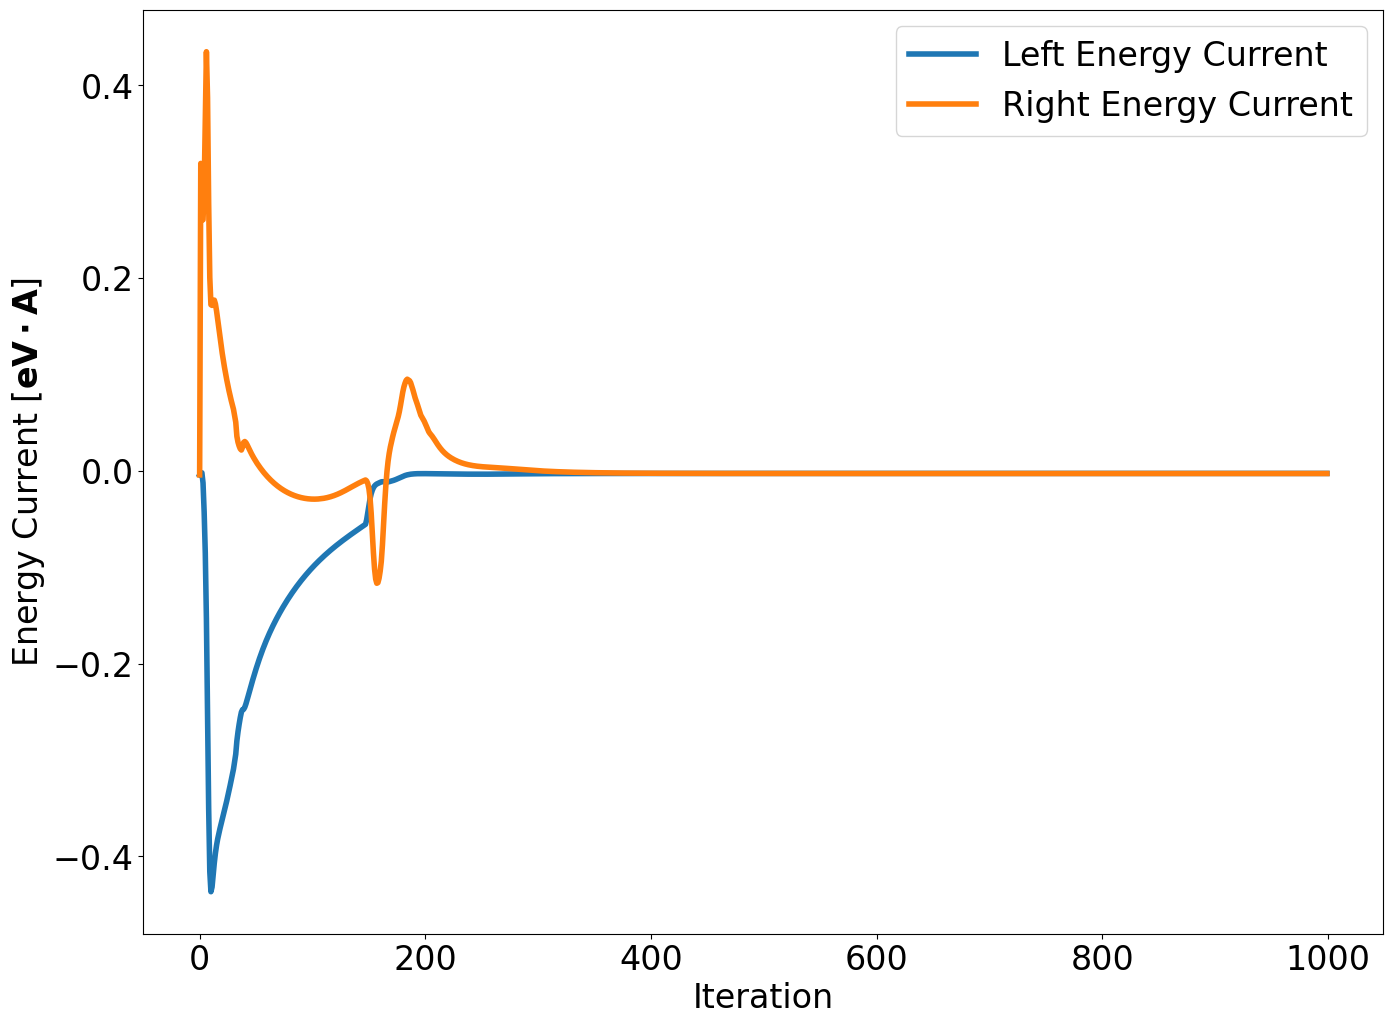

the best converged iteration is  457
with convergence :  0.0003381194571922923


In [174]:
num_iter = 1000
nblocks = 10
font = {'weight' : 'normal',
'size'   : 24}
matplotlib.rc('font', **font)

ID_L = np.zeros((num_iter)) # left energy current
ID_R = np.zeros((num_iter)) # right energy current
ID_M = np.zeros((num_iter)) # middle energy current
E = np.loadtxt(PATH +'E.dat')
conservation_cond = np.zeros((num_iter))
dE = E[1] - E[0]
for i in range(num_iter):
    IDE_temp = np.loadtxt(PATH + 'IDE_' + str(i) + '.dat').view(complex)
    ID_L[i] = np.sum(IDE_temp.real*np.tile(E, (IDE_temp.shape[1],1)).T, axis = 0)[0] * dE
    ID_R[i] = np.sum(IDE_temp.real*np.tile(E, (IDE_temp.shape[1],1)).T, axis = 0)[-1] * dE
    ID_M[i] = np.sum(IDE_temp.real*np.tile(E, (IDE_temp.shape[1],1)).T, axis = 0)[nblocks//2] * dE

    conservation_cond[i] = (ID_L[i]-ID_R[i])/(ID_R[i])
    if np.abs(conservation_cond[i]) < 0.01:
        print('Conservation condition satisfied at iteration', i)

plt.figure(figsize=(16,12))
plt.plot(np.arange(num_iter), ID_L, label = 'Left Energy Current', linewidth = 4)
plt.plot(np.arange(num_iter), ID_R, label = 'Right Energy Current', linewidth = 4)
#plt.plot(np.arange(num_iter), ID_M, label = 'Middle Current')
plt.xlabel('Iteration')
plt.ylabel('Energy Current' + ' ' + r'$[\mathbf{eV \cdot A}]$')
plt.legend()
plt.show()

print("the best converged iteration is ", np.argmin(np.abs(conservation_cond[100:])) + 100)
print("with convergence : ", conservation_cond[np.argmin(np.abs(conservation_cond[100:])) + 100])

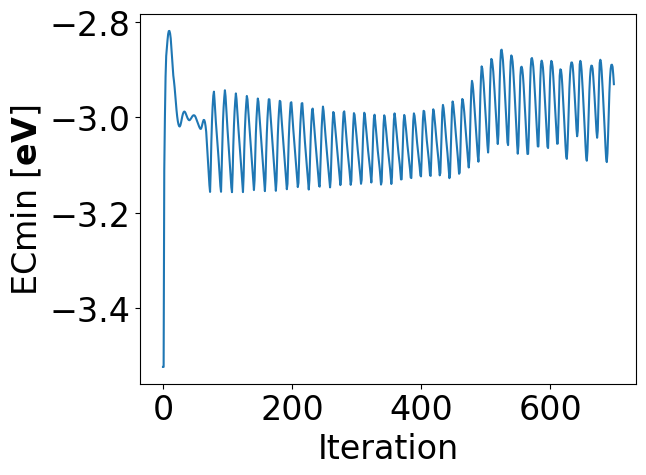

In [76]:
num_iter = 700
font = {'weight' : 'normal',
'size'   : 24}
matplotlib.rc('font', **font)
ECmin_vec = np.loadtxt(PATH + 'ECmin.dat')
plt.figure()
plt.plot(np.arange(num_iter), ECmin_vec[0:num_iter])
plt.xlabel('Iteration')
plt.ylabel('ECmin' + ' ' + r'$[\mathbf{eV}]$')
plt.show()


In [30]:
def plot_line(PATH, i):

    font = {'weight' : 'normal',
	'size'   : 32}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    DOS_ZERO = np.loadtxt(PATH + 'DOS_0.dat').view(complex)
    DOS_TEST = np.loadtxt(PATH + 'DOS_' + str(i) + '.dat').view(complex)
    
    E = np.loadtxt(PATH + 'E.dat')
    EFL = np.loadtxt(PATH + 'EFL.dat')
    EFR = np.loadtxt(PATH + 'EFR.dat')
    x = np.arange(12)
    x_fl = np.linspace(-0.5, 12.55, 100)
    #Efl_dotted = EFL[i] * np.ones((7))
    #Efr_dotted = EFR[i] * np.ones((7))
    shift = EFL[i+1] - EFL[0]
    
    plt.figure(figsize = (12,8))
    ax1 = plt.gca()
    ax1.set_ylabel('DOS' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')
    ax1.set_xlabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.plot(E, DOS_ZERO.T.real[6,:], linewidth = 4, label = "Ballistic")
    plt.plot(E-shift, DOS_TEST.T.real[6,:], linewidth = 4, label = "SC-GW eps = 3.0")
    #y_lim = np.max(DOS_TEST.T.real[0,:])
    y_lim = 250
    NE = E.shape[0]

    plt.plot(EFL[0]*np.ones((100,)), np.linspace(0, y_lim, 100), color = 'black', linestyle = 'dashed', linewidth = '4', label = 'Fermi Level')
    plt.ylim(-10 * y_lim, 4 * y_lim + 2)
    plt.xlim(-10, 10)
    #plt.text(EFL[0] - 1 , 4/5 * y_lim , r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.legend()
    plt.show()

    #ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    #ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    #plt.text(0.00+0.20, EFL[i] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    #plt.text(8.55-0.50, EFR[i] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)


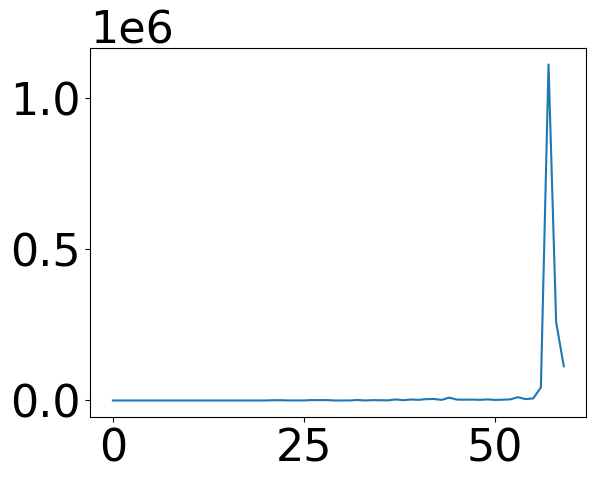

In [146]:
DOS_TEST = np.loadtxt(PATH + 'DOS_' + str(254) + '.dat').view(complex)
num_iter = 260
negative_sum = np.zeros((num_iter))
for i in range(num_iter):
    DOS_TEST = np.loadtxt(PATH + 'DOS_' + str(i) + '.dat').view(complex)
    negative_sum[i] = np.sum(np.real(DOS_TEST[np.where(np.real(DOS_TEST) < 0)]))

plt.plot(np.abs(negative_sum[200:]))

In [8]:
N_ZERO = np.loadtxt(PATH + 'n' + 'P' + '_0.dat').view(complex)
np.sum(N_ZERO[:, 6])

(241115.56653983318-1.4323667010513622e-06j)

In [342]:
def plot_line_nEP(PATH, i, block, carrier = 'E'):

    font = {'weight' : 'normal',
	'size'   : 32}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)

    N_ZERO = np.loadtxt(PATH + 'DOS_' + str(i) + '.dat').view(complex)
    N_TEST = np.loadtxt(PATH + 'n' + carrier + '_' + str(i) + '.dat').view(complex)

    # N_TEST = np.loadtxt(PATH + 'n' + carrier + '_0.dat').view(complex)
    # N_ZERO = np.loadtxt(PATH + 'DOS_' + str(0) + '.dat').view(complex)
    
    E = np.loadtxt(PATH + 'E.dat')
    EFL = np.loadtxt(PATH + 'EFL.dat')
    EFR = np.loadtxt(PATH + 'EFR.dat')
    x = np.arange(12)
    x_fl = np.linspace(-0.5, 12.55, 100)
    #Efl_dotted = EFL[i] * np.ones((7))
    #Efr_dotted = EFR[i] * np.ones((7))
    shift = EFL[i+1] - EFL[0]
    print(shift)
    
    plt.figure(figsize = (12,8))
    ax1 = plt.gca()
    ax1.set_ylabel('Concentration' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')
    ax1.set_xlabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.plot(E-shift, N_ZERO.T.real[block,:]/4, linewidth = 4, label = "Ballistic")
    plt.plot(E-shift, N_TEST.T.real[block,:]*10, linewidth = 4, label = "SC-GW eps = 5.0")
    #y_lim = np.max(DOS_TEST.T.real[0,:])
    y_lim = 20
    NE = E.shape[0]

    plt.plot(EFR[0]*np.ones((100,)), np.linspace(0, y_lim, 100), color = 'black', linestyle = 'dashed', linewidth = '4', label = 'Fermi Level')
    plt.ylim(-y_lim, 4 * y_lim + 2)
    plt.xlim(-3, -1)
    #plt.text(EFL[0] - 1 , 4/5 * y_lim , r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.legend()
    plt.show()

    #ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    #ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    #plt.text(0.00+0.20, EFL[i] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    #plt.text(8.55-0.50, EFR[i] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)

0.34978058430948833


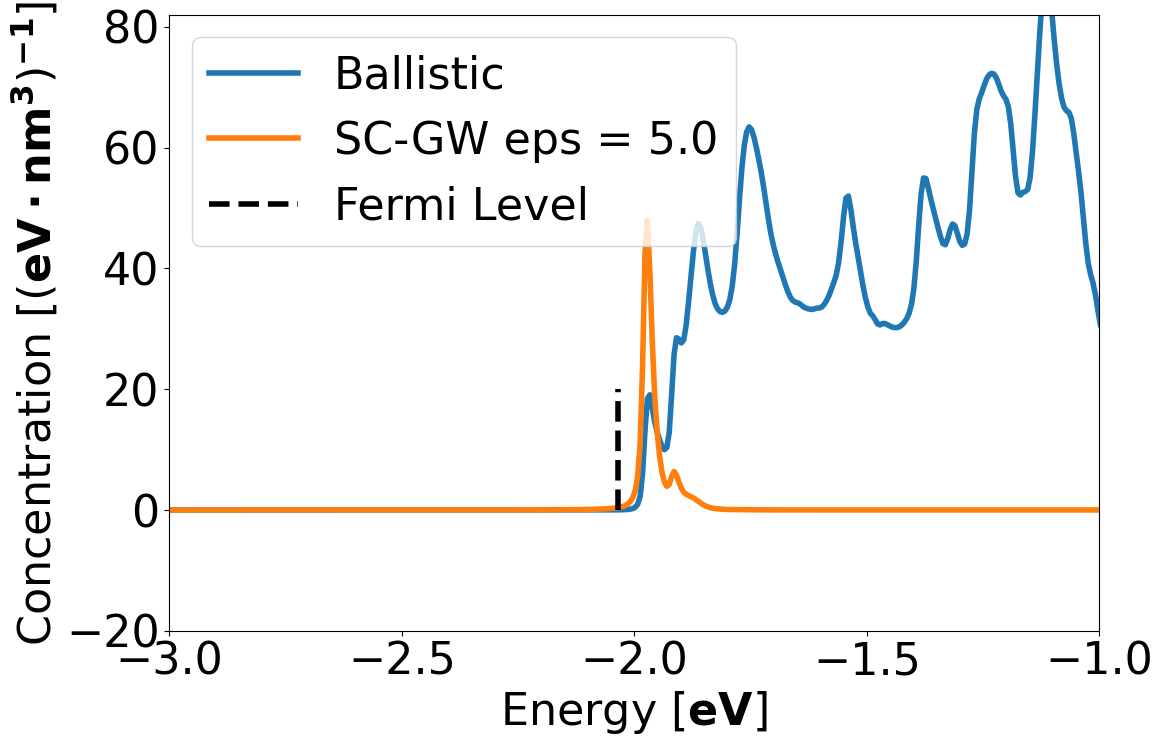

In [141]:
plot_line_nEP(PATH , 250,  3)

0.34978058430948833


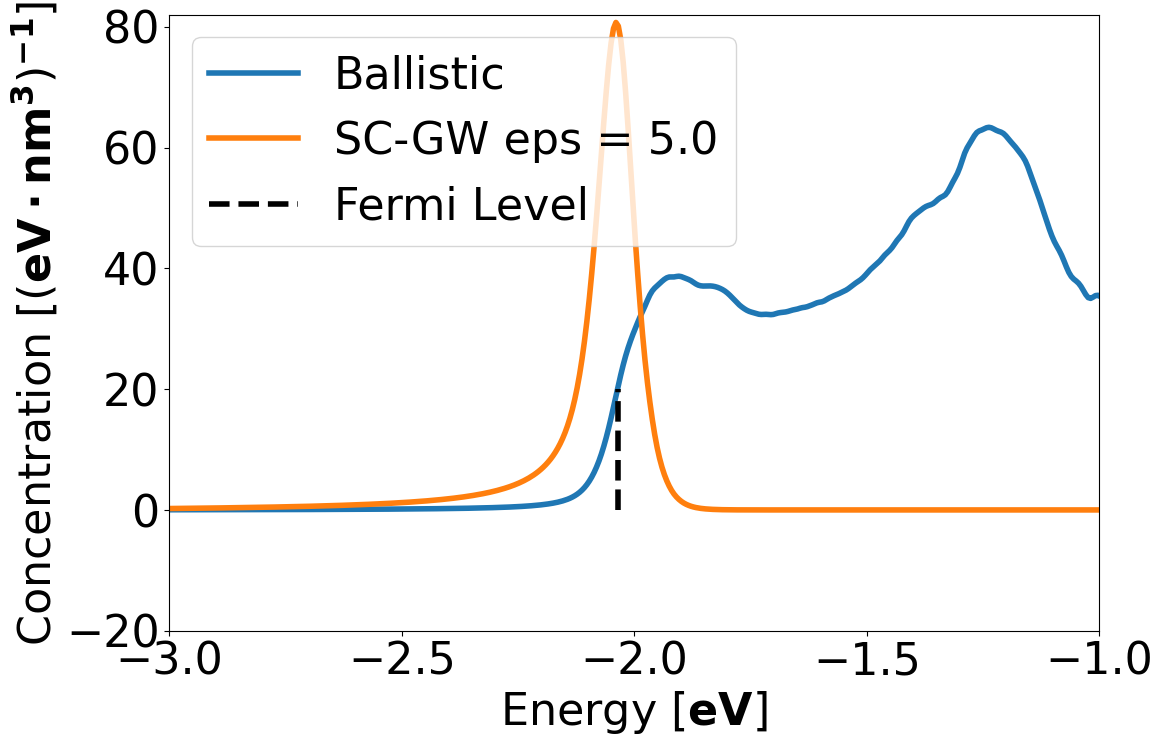

In [145]:
plot_line_nEP(PATH , 250,  0)

0.34978058430948833


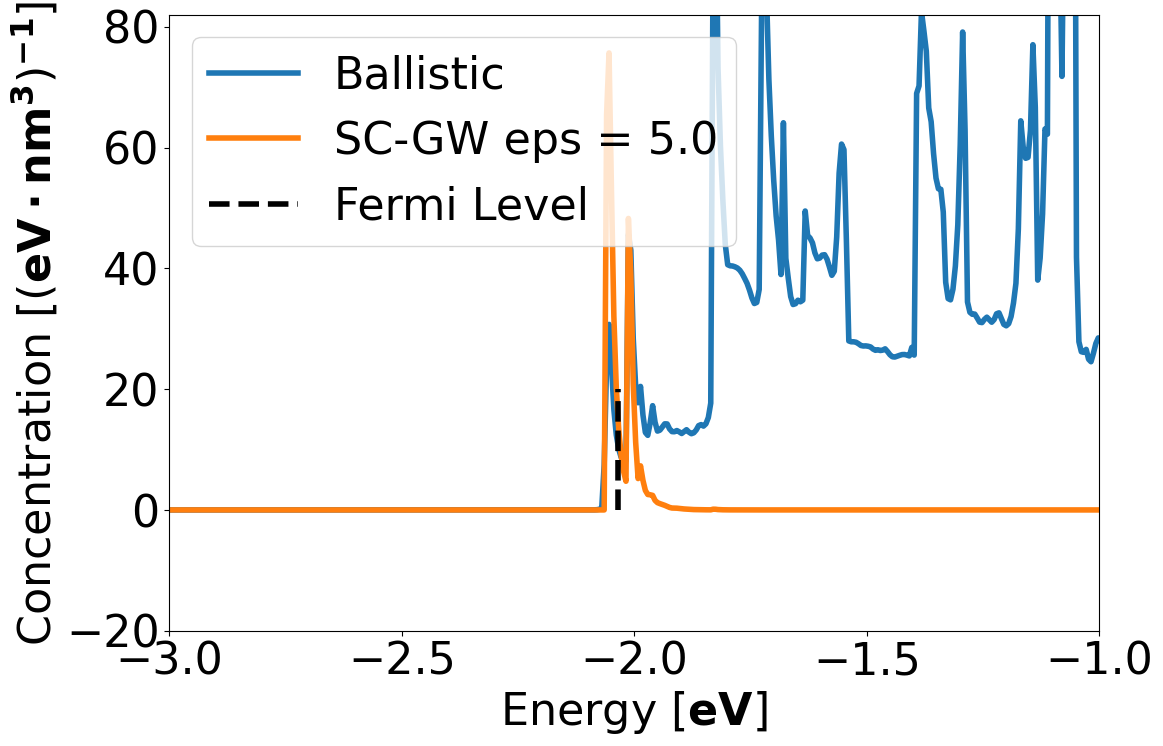

In [147]:
plot_line_nEP(PATH , 250,  3)

0.34978058430948833


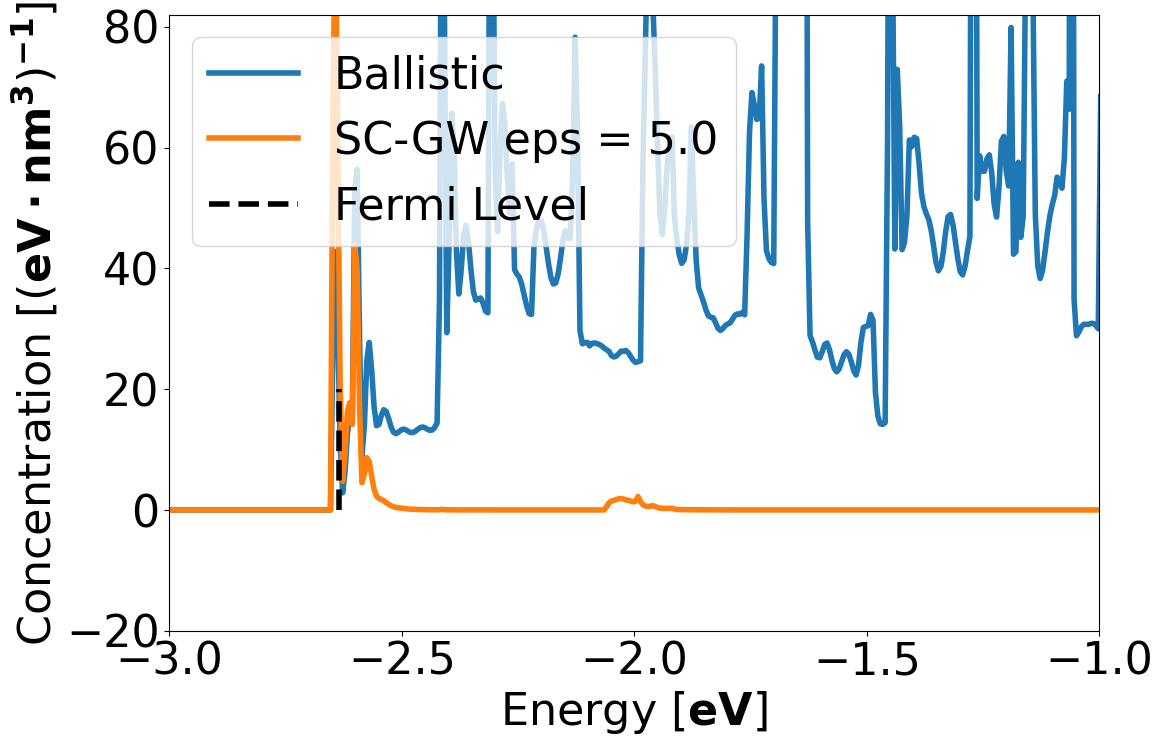

In [291]:
plot_line_nEP(PATH , 250,  -1)

0.34978058430948833


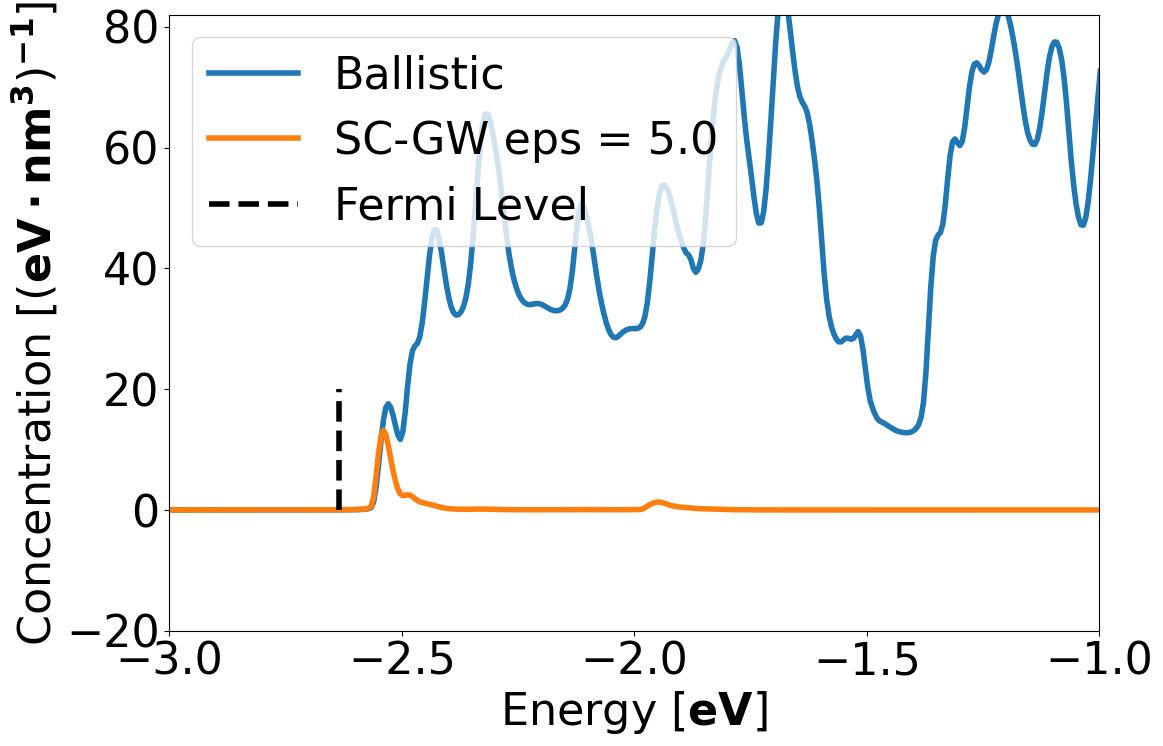

In [343]:
plot_line_nEP(PATH , 250,  -3)

In [145]:
def plot_line_quasi_fermi(PATH, i, block, carrier = 'E'):

    font = {'weight' : 'normal',
	'size'   : 26}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)

    def fermi(temp, energy, fermi_energy):
        return 1/(1 + np.exp((energy - fermi_energy)/(kB*temp/e)))

    DOS_TEST = np.loadtxt(PATH + 'DOS_' + str(i) + '.dat').view(complex)
    N_TEST = np.loadtxt(PATH + 'n' + carrier + '_' + str(i) + '.dat').view(complex)

    N_ZERO = np.loadtxt(PATH + 'n' + carrier + '_0.dat').view(complex)
    DOS_ZERO = np.loadtxt(PATH + 'DOS_' + str(0) + '.dat').view(complex)
    
    E = np.loadtxt(PATH + 'E.dat')

    EFL = np.loadtxt(PATH + 'EFL.dat')
    EFR = np.loadtxt(PATH + 'EFR.dat')
    fermi_E_GW = fermi(358, E, EFR[0])
    fermi_E = fermi(300, E, EFR[0])
    x = np.arange(12)
    x_fl = np.linspace(-0.5, 12.55, 100)
    #Efl_dotted = EFL[i] * np.ones((7))
    #Efr_dotted = EFR[i] * np.ones((7))
    shift = EFL[i+1] - EFL[0]
    print(shift)

    eta = 1e-12
    plt.figure(figsize = (12,8))
    ax1 = plt.gca()
    ax1.set_ylabel('Occupancy')
    ax1.set_xlabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plt.ticklabel_format(axis = 'y', scilimits=(-5,5))

    plot = plt.plot(E, N_ZERO.T.real[block,:]/(DOS_ZERO.T.real[block, :] + eta), linewidth = 6, label = "Occupancy NEGF", linestyle = 'dashdot')
    plot = plt.plot(E, fermi_E, label = "Fermi Distribution at 300K", linestyle = 'dashed', color = 'orange')

    plot = plt.plot(E-shift, N_TEST.T.real[block,:]/(DOS_TEST.T.real[block, :] + eta), linewidth = 6, label = "Occupancy NEGF + scGW", color = 'red', linestyle ='dashdot')
    plot = plt.plot(E, fermi_E_GW + 0.0000208, label = "Modified Fermi Distribution (358K)", linestyle = 'dashed', color = 'black')

    #plot = plt.plot(E, fermi_E, label = "Modified Fermi Distribution (358K)", linestyle = 'dashed')
    #plt.plot(E-shift, N_TEST.T.real[block,:]*10, linewidth = 4, label = "SC-GW eps = 5.0")
    #y_lim = np.max(DOS_TEST.T.real[0,:])
    y_lim = 6e-5
    NE = E.shape[0]

    #plt.plot(EFR[0]*np.ones((100,)), np.linspace(0, y_lim, 100), color = 'black', linestyle = 'dashed', linewidth = '4', label = 'Fermi Level')
    plt.ylim(0, y_lim)
    plt.xlim(-2.3, -2.2)
    #plt.text(EFL[0] - 1 , 4/5 * y_lim , r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.legend()
    plt.show()

    #ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    #ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    #plt.text(0.00+0.20, EFL[i] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    #plt.text(8.55-0.50, EFR[i] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)

/tmp/ipykernel_1883042/2509183508.py:16: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp((energy - fermi_energy)/(kB*temp/e)))


0.34978058430948833


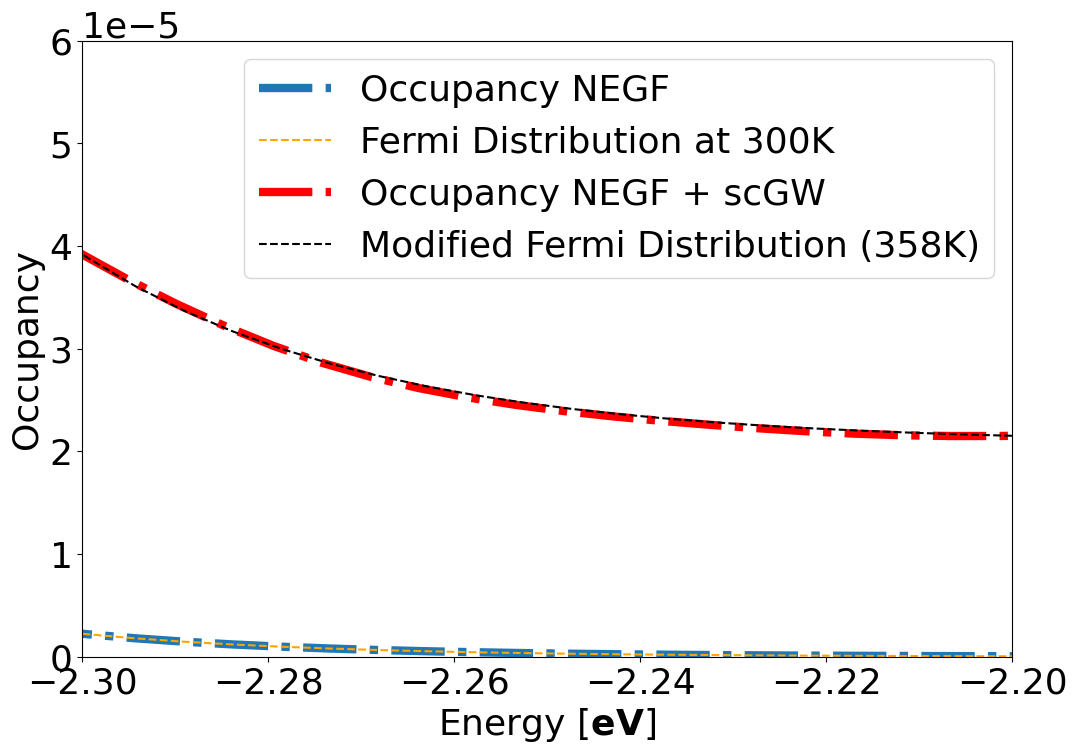

In [146]:
plot_line_quasi_fermi(PATH, 250, -3, carrier = 'E')

In [598]:
def plot_line_quasi_fermi_1(PATH, i, block, carrier = 'E'):

    font = {'weight' : 'normal',
	'size'   : 26}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)

    def fermi(temp, energy, fermi_energy):
        return 1/(1 + np.exp((energy - fermi_energy)/(kB*temp/e)))

    DOS_TEST = np.loadtxt(PATH + 'DOS_' + str(i) + '.dat').view(complex)
    N_TEST = np.loadtxt(PATH + 'n' + carrier + '_' + str(i) + '.dat').view(complex)

    N_ZERO = np.loadtxt(PATH + 'n' + carrier + '_0.dat').view(complex)
    DOS_ZERO = np.loadtxt(PATH + 'DOS_' + str(0) + '.dat').view(complex)
    
    E = np.loadtxt(PATH + 'E.dat')

    EFL = np.loadtxt(PATH + 'EFL.dat')
    EFR = np.loadtxt(PATH + 'EFR.dat')
    fermi_E_GW = fermi(440, E, EFR[0]-0.105)
    #fermi_E_GW = fermi(460, E, EFR[0]-0.124)
    fermi_E = fermi(300, E, EFR[0])
    x = np.arange(12)
    x_fl = np.linspace(-0.5, 12.55, 100)
    #Efl_dotted = EFL[i] * np.ones((7))
    #Efr_dotted = EFR[i] * np.ones((7))
    shift = EFL[i+1] - EFL[0]
    print(shift)

    eta = 1e-12
    plt.figure(figsize = (12,8))
    ax1 = plt.gca()
    ax1.set_ylabel('Occupancy')
    ax1.set_xlabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plt.ticklabel_format(axis = 'y', scilimits=(-4,4))

    plot = plt.plot(E, N_ZERO.T.real[block,:]/(DOS_ZERO.T.real[block, :] + eta), linewidth = 6, label = "Occupancy NEGF", linestyle = 'dashdot')
    plot = plt.plot(E, fermi_E, label = "Fermi Distribution at (300K)", linestyle = 'dashed', color = 'orange')

    plot = plt.plot(E-shift, N_TEST.T.real[block,:]/(DOS_TEST.T.real[block, :] + eta), linewidth = 6, label = "Occupancy NEGF + scGW", color = 'red', linestyle ='dashdot')
    plot = plt.plot(E, fermi_E_GW + 0.0000200, label = "Modified Fermi Distribution (440)", linestyle = 'dashed', color = 'black')

    #plot = plt.plot(E, fermi_E, label = "Modified Fermi Distribution (358K)", linestyle = 'dashed')
    #plt.plot(E-shift, N_TEST.T.real[block,:]*10, linewidth = 4, label = "SC-GW eps = 5.0")
    #y_lim = np.max(DOS_TEST.T.real[0,:])
    y_lim = 2e-4
    NE = E.shape[0]

    #plt.plot(EFR[0]*np.ones((100,)), np.linspace(0, y_lim, 100), color = 'black', linestyle = 'dashed', linewidth = '4', label = 'Fermi Level')
    plt.ylim(0, y_lim)
    plt.xlim(-2.4, -2.2)
    #plt.text(EFL[0] - 1 , 4/5 * y_lim , r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.legend()
    plt.show()

    #ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    #ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    #plt.text(0.00+0.20, EFL[i] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    #plt.text(8.55-0.50, EFR[i] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)

/tmp/ipykernel_1239719/953504857.py:16: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp((energy - fermi_energy)/(kB*temp/e)))


0.34978058430948833


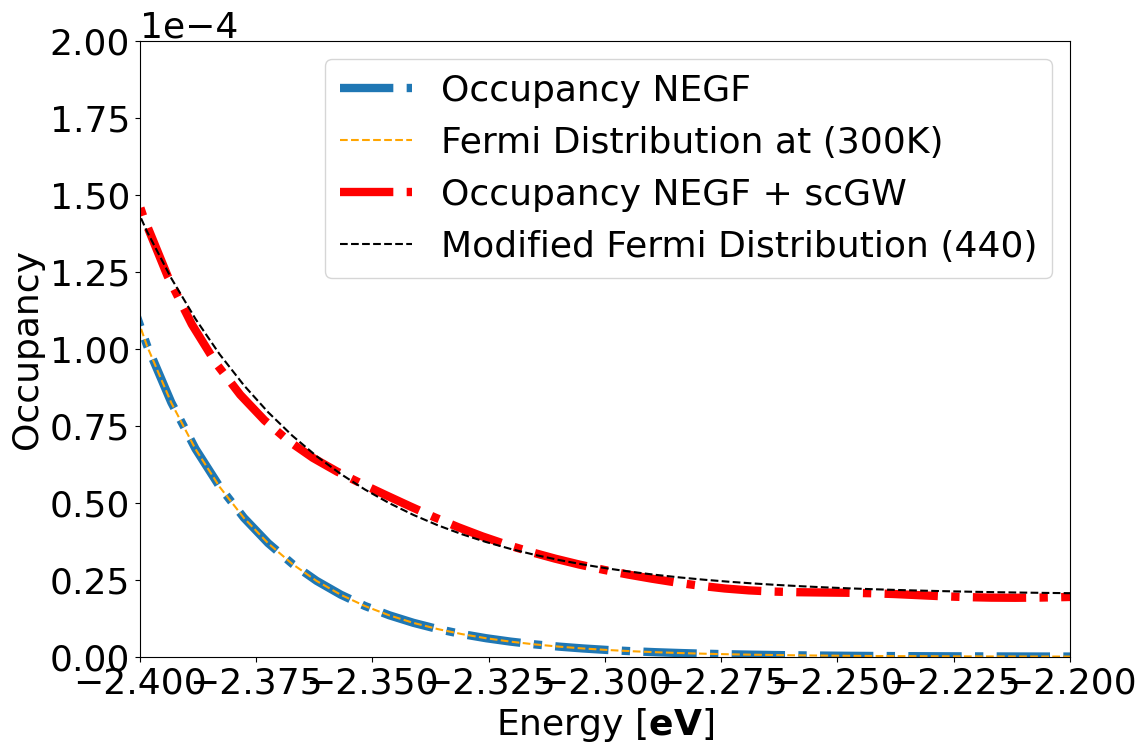

In [599]:
plot_line_quasi_fermi_1(PATH, 250, -1, carrier = 'E')

In [662]:
def plot_line_quasi_fermi_2(PATH, i, block, carrier = 'E'):

    font = {'weight' : 'normal',
	'size'   : 26}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)

    def fermi(temp, energy, fermi_energy):
        return 1/(1 + np.exp((energy - fermi_energy)/(kB*temp/e)))

    DOS_TEST = np.loadtxt(PATH + 'DOS_' + str(i) + '.dat').view(complex)
    N_TEST = np.loadtxt(PATH + 'n' + carrier + '_' + str(i) + '.dat').view(complex)

    N_ZERO = np.loadtxt(PATH + 'n' + carrier + '_0.dat').view(complex)
    DOS_ZERO = np.loadtxt(PATH + 'DOS_' + str(0) + '.dat').view(complex)
    
    E = np.loadtxt(PATH + 'E.dat')

    EFL = np.loadtxt(PATH + 'EFL.dat')
    EFR = np.loadtxt(PATH + 'EFR.dat')
    fermi_E_GW = fermi(337, E, EFR[0])
    fermi_E = fermi(300, E, EFR[0])
    x = np.arange(12)
    x_fl = np.linspace(-0.5, 12.55, 100)
    #Efl_dotted = EFL[i] * np.ones((7))
    #Efr_dotted = EFR[i] * np.ones((7))
    shift = EFL[i+1] - EFL[0]
    print(shift)

    eta = 1e-12
    plt.figure(figsize = (12,8))
    ax1 = plt.gca()
    ax1.set_ylabel('Occupancy')
    ax1.set_xlabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plt.ticklabel_format(axis = 'y', scilimits=(-5,5))

    plot = plt.plot(E, N_ZERO.T.real[block,:]/(DOS_ZERO.T.real[block, :] + eta), linewidth = 6, label = "Occupancy NEGF", linestyle = 'dashdot')
    plot = plt.plot(E, fermi_E, label = "Fermi Distribution at (300K)", linestyle = 'dashed', color = 'orange')

    plot = plt.plot(E-shift, N_TEST.T.real[block,:]/(DOS_TEST.T.real[block, :] + eta), linewidth = 6, label = "Occupancy NEGF + scGW", color = 'red', linestyle ='dashdot')
    plot = plt.plot(E, fermi_E_GW + 0.000019, label = "Modified Fermi Distribution (358K)", linestyle = 'dashed', color = 'black')

    #plot = plt.plot(E, fermi_E, label = "Modified Fermi Distribution (358K)", linestyle = 'dashed')
    #plt.plot(E-shift, N_TEST.T.real[block,:]*10, linewidth = 4, label = "SC-GW eps = 5.0")
    #y_lim = np.max(DOS_TEST.T.real[0,:])
    y_lim = 6e-5
    NE = E.shape[0]

    #plt.plot(EFR[0]*np.ones((100,)), np.linspace(0, y_lim, 100), color = 'black', linestyle = 'dashed', linewidth = '4', label = 'Fermi Level')
    plt.ylim(0, y_lim)
    plt.xlim(-2.3, -2.25)
    #plt.text(EFL[0] - 1 , 4/5 * y_lim , r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.legend()
    plt.show()

    #ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    #ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    #plt.text(0.00+0.20, EFL[i] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    #plt.text(8.55-0.50, EFR[i] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)

0.34978058430948833


/tmp/ipykernel_1239719/1342571166.py:16: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp((energy - fermi_energy)/(kB*temp/e)))


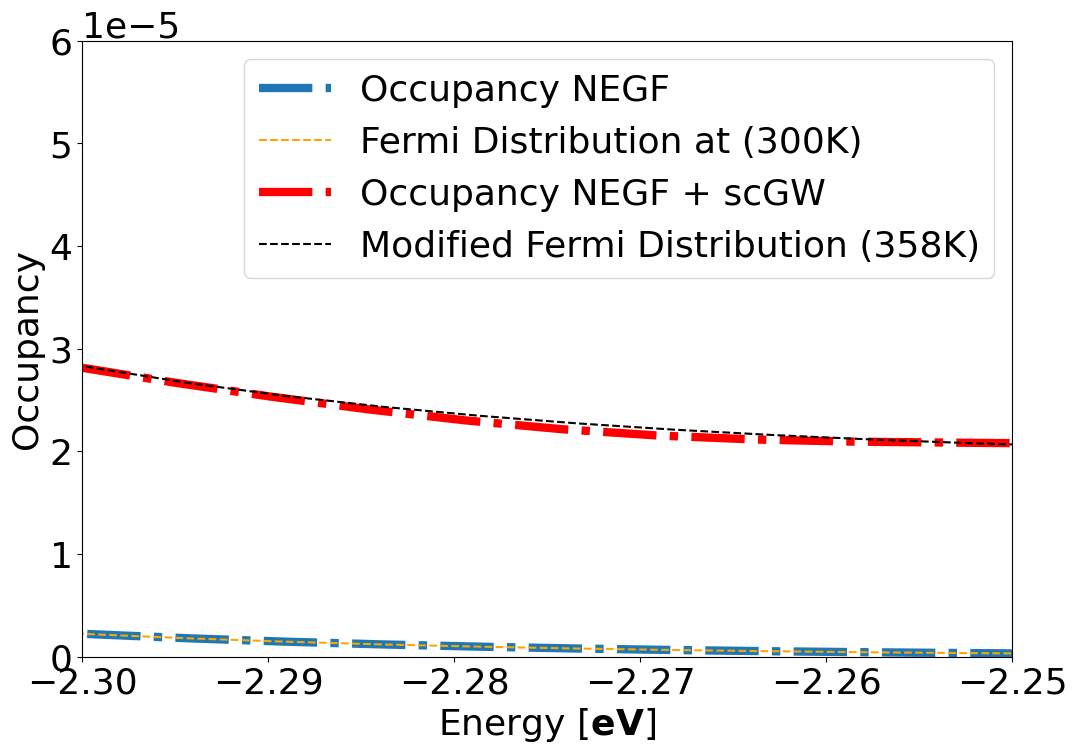

In [663]:
plot_line_quasi_fermi_2(PATH, 250, -1, carrier = 'E')

In [169]:
def plot_line_compare(PATHs, legends, linestyles,  iters, slice = 0):
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)

        
    font = {'weight' : 'normal',
	'size'   : 35}

    def fmt_1(x, pos):
        return int(x)

    plt.figure(figsize = (12,8))
    ax1 = plt.gca()
    ax1.set_ylabel('DOS' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')
    ax1.set_xlabel('Energy' + ' '  + r'$[\mathbf{eV}]$')

    x = np.arange(10)
    x_fl = np.linspace(-0.5, 9.55, 100)

    y_lim = 80
    
    plt.ylim(0, y_lim + 2)
    plt.xlim(-4.5, -2.5)

    for path, legend, linestyle, i in zip(PATHs, legends, linestyles, iters):    
        DOS_ZERO = np.loadtxt(path + 'DOS_0.dat').view(complex)
        DOS_TEST = np.loadtxt(path + 'DOS_' + str(i) + '.dat').view(complex)
        E = np.loadtxt(path + 'E.dat')
        EFL = np.loadtxt(path + 'EFL.dat')
        EFR = np.loadtxt(path + 'EFR.dat')
        shift = EFL[i+1] - EFL[0]
        plt.plot(E-shift, DOS_TEST.T.real[slice,:], linewidth = 4, label = legend, linestyle = linestyle)


    plot = plt.plot(E, DOS_ZERO.T.real[slice,:], linewidth = 4, label = "Ballistic")
    plt.plot(EFL[0]*np.ones((100,)), np.linspace(0, y_lim, 100), color = 'black', linestyle = 'dashed', linewidth = '4', label = 'Fermi Level')


    plt.legend(fontsize = 25)
    plt.show()

    #ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    #ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    #plt.text(0.00+0.20, EFL[i] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    #plt.text(8.55-0.50, EFR[i] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)size = 27)

In [172]:
Paths = ['/usr/scratch/tortin19/dleonard/daint_results/CNT_biased_cf_epsR1_n76/'
         ,'/usr/scratch/tortin19/dleonard/daint_results/CNT_biased_cf_epsR1_n107/'
         ,'/usr/scratch/tortin19/dleonard/daint_results/CNT_biased_cf_epsR1_n145/'
         ,'/usr/scratch/tortin19/dleonard/daint_results/CNT_biased_SC_BB1_epsR1_n174/']

#, '/usr/scratch/tortin19/dleonard/daint_results/CNT_biased_cf_epsR1_n145/'

legends = ['n76', 'n107', 'n145', 'n174()']
linestyles = ['solid', 'dashed', 'dashdot', 'dotted']
iters = [149, 250, 590, 500]

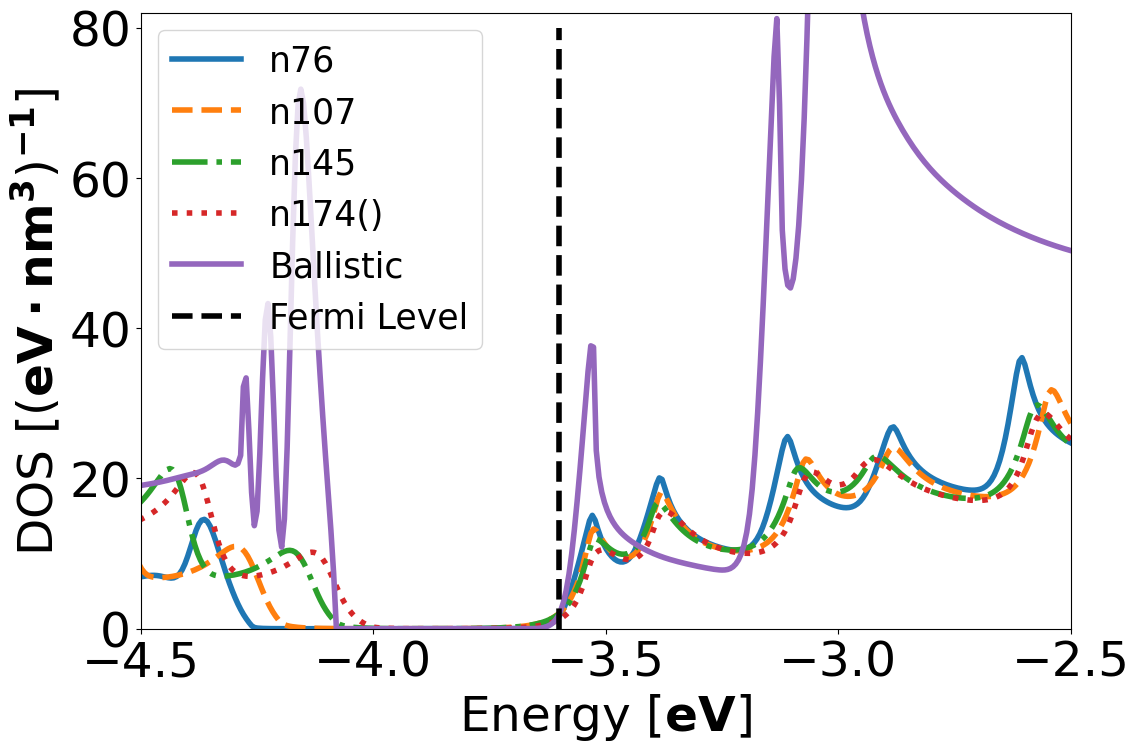

In [173]:
plot_line_compare(Paths, legends, linestyles, iters, slice = 3)

In [175]:
def plot_line_W(path, i, block):

    font = {'weight' : 'normal',
	'size'   : 35}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    DOS_ZERO = np.loadtxt(path + 'DOSW_0.dat').view(complex)
    DOS_TEST = np.loadtxt(path + 'DOSW_' + str(i) + '.dat').view(complex)
    
    E = np.loadtxt(path + 'E.dat')
    EFL = np.loadtxt(path + 'EFL.dat')
    EFR = np.loadtxt(path + 'EFR.dat')
    NE = E.shape[0]
    range_E = E[-1] - E[0]
    E_symm = np.linspace(0, range_E, NE)


    x = np.arange(10)
    x_fl = np.linspace(-0.5, 9.55, 100)
    #Efl_dotted = EFL[i] * np.ones((7))
    #Efr_dotted = EFR[i] * np.ones((7))
    #shift = EFL[i] - EFL[0]
    
    plt.figure(figsize = (15,12))
    ax1 = plt.gca()
    ax1.set_ylabel('DOS' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')
    ax1.set_xlabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.plot(E_symm, DOS_ZERO.T.real[block,:], linewidth = 4, label = "Ballistic")
    plt.plot(E_symm, DOS_TEST.T.real[block,:], linewidth = 4, label = "SC-GW at iteration " + str(i))
    #y_lim = np.max(DOS_TEST.T.real[0,:])
    y_lim = 3000
    

    #plt.plot(EFL[0]*np.ones((100,)), np.linspace(0, y_lim, 100), color = 'black', linestyle = 'dashed', linewidth = '4', label = 'Fermi Level')
    plt.ylim(-10, y_lim + 2)
    plt.xlim(0, range_E)
    #plt.text(EFL[0] - 1 , 4/5 * y_lim , r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.legend()
    plt.show()

    #ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    #ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    #plt.text(0.00+0.20, EFL[i] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    #plt.text(8.55-0.50, EFR[i] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)


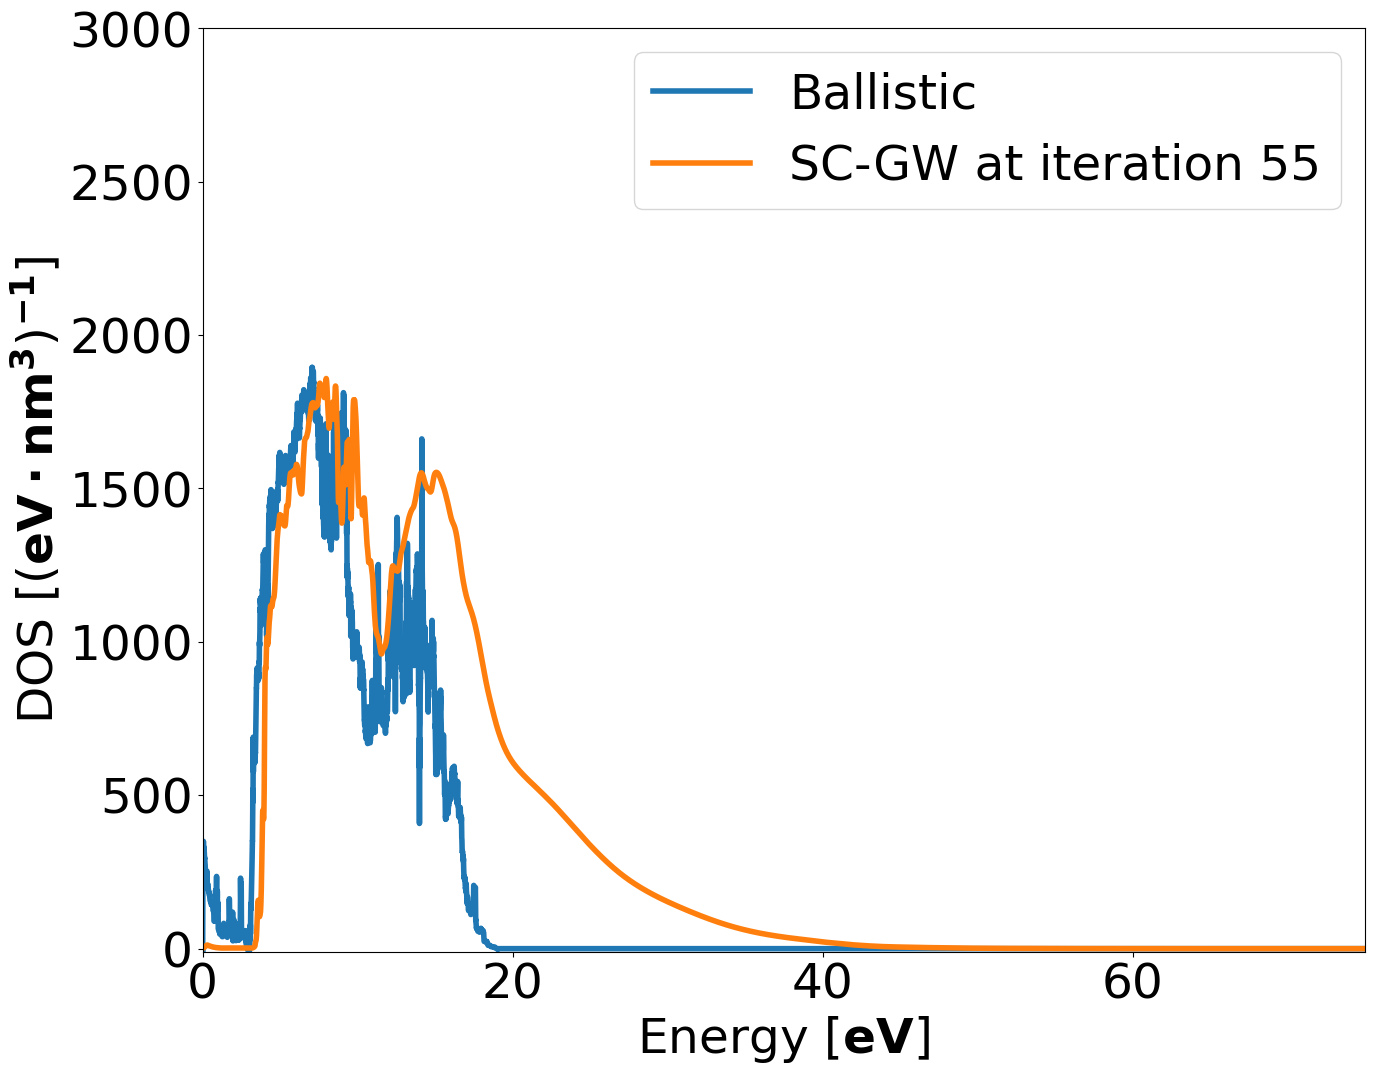

In [179]:
plot_line_W(PATH, 55, 2)

In [13]:
Temp = 300
kB = 1.38e-23
hbar = 1.05457e-31 # [m^2 kg /s]
m0 = 9.11e-31 # [kg]
e = 1.6022e-19
m_eff_factor = 0.097
band_offset = 0.63 # [eV]
no_valley = 1 # number of valleys
mos = 0 # 0 for NMOS, 1 for PMOS
ground = 1 # if 1 set CBE to 0
from read_dat_filetoframe import *

prefix = 'SCATTEL'
O_prefix = 'SCATTEL'
bias_point = 13
Dph_point = 6

spin = 2

In [14]:
OMENP = '/home/mluisier/results/GW/Si_nanowire/SC/13/'

In [15]:
Lx_file = OMENP + 'Lx.dat'
Lx_frame = read_dat_filetoframe(Lx_file)

In [25]:
#OMEN File Names
Potential_file = OMENP + 'SCATTEL_Vpot_0.dat'
#Potential_file = OMENP + 'vtot_dats12'
#Potential_file = OMENP + 'vtot_dat100'
chargeden_file = OMENP + 'SCATTEL_n_0.dat'


slab_number = OMENP + 'number_of_slabs.dat'
atom_index_file = OMENP + 'atom_index.dat'


#Load Values
Potential_frame = read_dat_filetoframe(Potential_file)
chargeden_frame = read_dat_filetoframe(chargeden_file)

slab_frame = read_dat_filetoframe(slab_number)
atom_index_frame = read_dat_filetoframe(atom_index_file)


# Analyze a single bias point
Vpot0 = Potential_frame.loc[bias_point, :].to_numpy()
n0 = chargeden_frame.loc[bias_point, :].to_numpy()
slab_num = slab_frame.values[0][0]
atom_index = atom_index_frame.to_numpy()
atom_index = np.concatenate(atom_index, axis = 0)
tot_atoms_num = n0.shape[0]


# Transform data so that values are stored in rows for each atomic layer
n1 = np.sum(np.reshape(n0, (tot_atoms_num // slab_num, slab_num), order = 'F'),axis = 0)
Vtmp = np.multiply(Vpot0[atom_index], n0)
Vtmp = np.sum(np.reshape(Vtmp, (tot_atoms_num // slab_num , slab_num), order = 'F'), axis = 0)

Vpot1 = np.divide(Vtmp, n1)

In [26]:
Vpot1.shape

(13,)

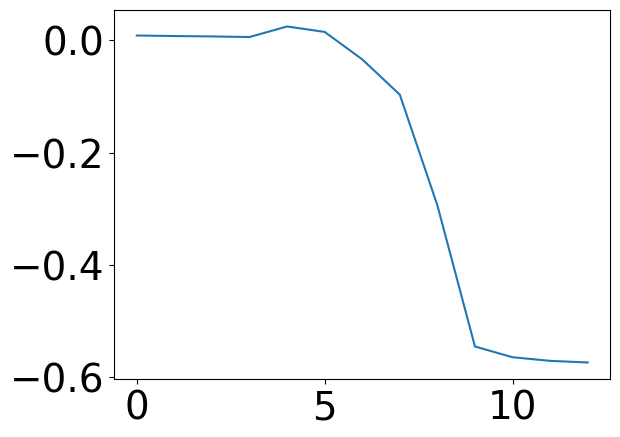

In [27]:
plt.plot(Vpot1)

In [28]:
from scipy.interpolate import CubicSpline, make_interp_spline, PchipInterpolator

In [20]:
Vpot1 = np.array([-2.63, -2.63, -2.63, -2.65, -2.91, -2.96, -2.97, -2.978, -2.98, -2.98, -2.98, -2.98])

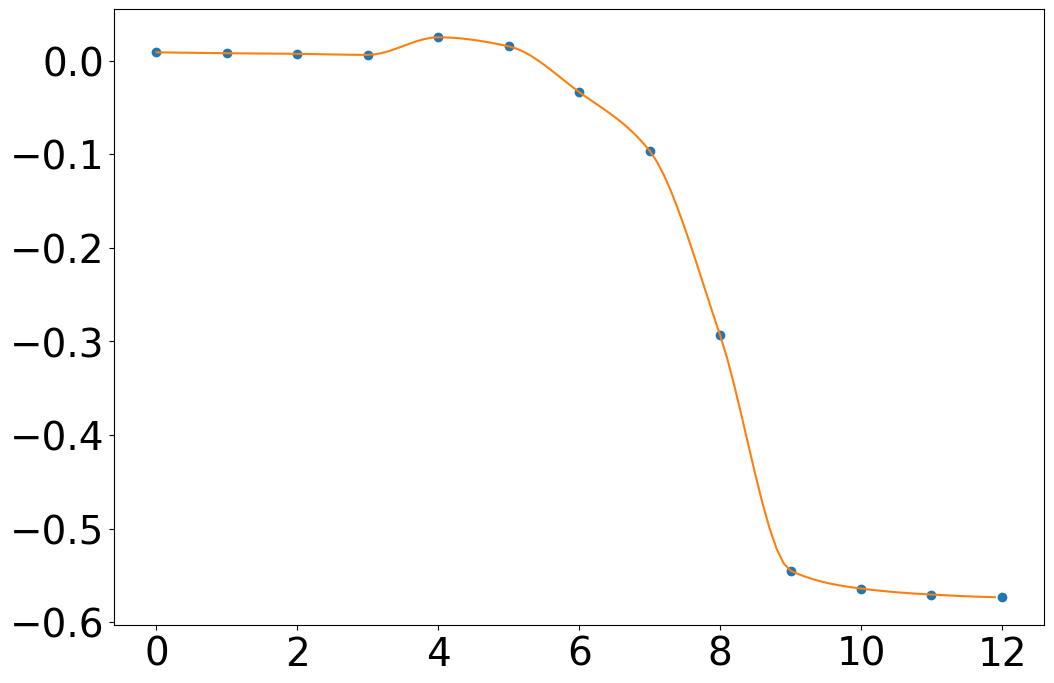

In [29]:
x = np.arange(13)
cs = PchipInterpolator(x, Vpot1)
xs = np.arange(0, 12, 0.1)
plt.figure(figsize = (12,8))
plt.plot(x, Vpot1, 'o', label='data')
plt.plot(xs, cs(xs), label="S")


In [4]:
PATH = '/usr/scratch/tortin19/dleonard/daint_results/'
import scipy

In [5]:
H_sparse = scipy.io.loadmat(PATH + 'H.mat')

In [8]:
H_sparse['H'].shape

(5408, 5408)

In [15]:
H_sparse['H']

<5408x5408 sparse matrix of type '<class 'numpy.float64'>'
	with 3798080 stored elements in Compressed Sparse Column format>

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

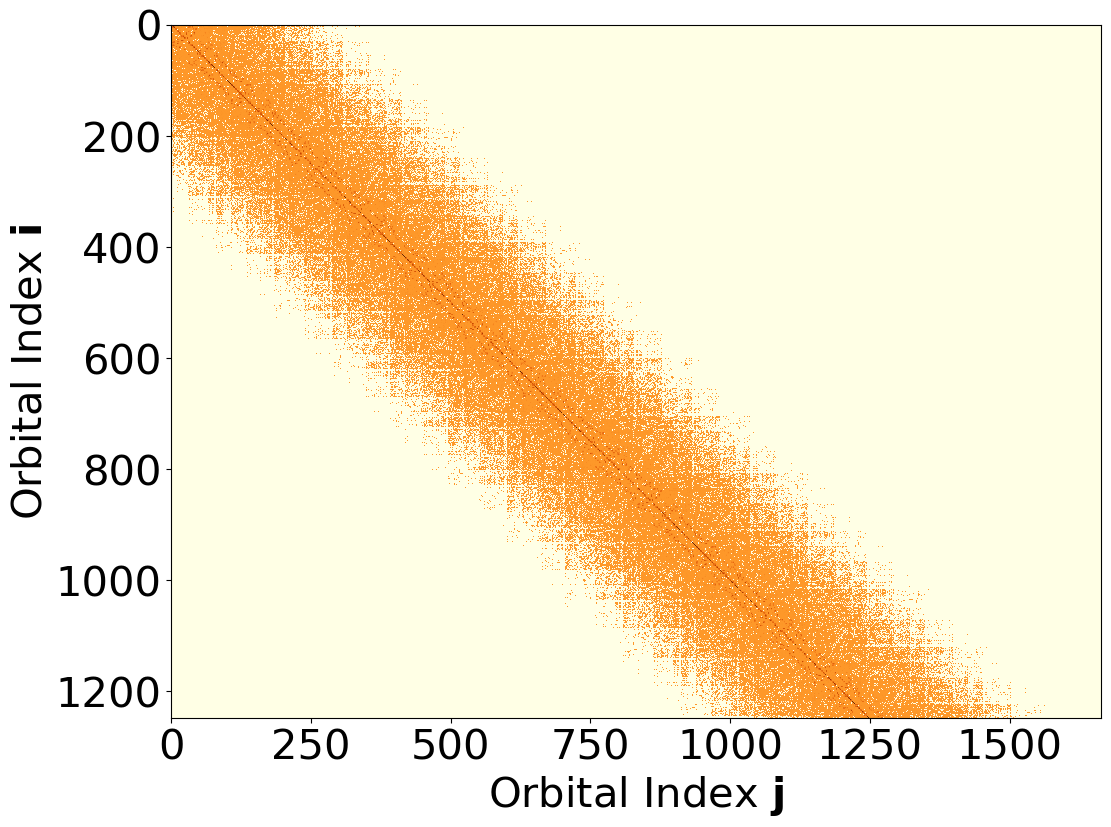

In [51]:
# Plotting
font = {'family' : 'normal',
        'weight' : 'normal',
	'size'   : 30}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize = (12, 9))
x = np.arange(H_sparse['H'].shape[0])
y = np.arange(H_sparse['H'].shape[1])

max_value = np.max(np.abs(H_sparse['H'].toarray()[0:1248, 0:1664]))
C_mat = np.abs(H_sparse['H'].toarray()[0:1248, 0:1664])
C_mat[np.where((np.abs(C_mat) > 10**-(2.5)))] += max_value

c = ax.pcolormesh(C_mat, cmap=plt.cm.YlOrBr)

#ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([0, 1664, 1248, 0])
#plt.yticks(np.arange(0, 3000, 10))
#cbar =fig.colorbar(c, ax=ax)
#cbar.ax.set_ylabel('Bare Coulomb Interaction' + ' ' + r'$[\mathbf{eV}]$')
#extraticks =[104, 208, 312, 416]
#plt.xticks(list(plt.xticks()[0]) + extraticks)
#plt.yticks(list(plt.yticks()[0]) + extraticks)

plt.xlabel('Orbital Index' + ' ' + r'$\mathbf{j}$')
plt.ylabel('Orbital Index' + ' '  + r'$\mathbf{i}$')
#plt.savefig('Coulomb_matrix.png', dpi = 150, bbox_inches = 'tight')
plt.show()